##**CONJUNTOS DE DADOS DIPONÍVEIS EM:**

Análise do caso Kaggle <https://www.kaggle.com/datasets/uciml/electric-power-consumption-data-set/data>

Fonte: <https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption>

**ANÁLISE DO ARQUIVO:** "Consumo individual de energia elétrica doméstica" ('household_power_consumption.csv')

#**SUMÁRIO:**

##**Consumo Individual de Energia Elétrica Residencial**


**1. Informações Gerais:**

Doação: 29/08/2012
Tipo de Dados: Multivariada, Série Temporal

Área da Matéria: Física e Química

Tarefas Associadas: Regressão, Agrupamento

Tipo de Recurso: Real

**2. Detalhes do Conjunto de Dados:**

Instâncias: 2.075.259
Características: 9
Período de Coleta: Dezembro de 2006 a Novembro de 2010 (47 meses)

**3. Descrição Adicional:**

O conjunto contém medições de uma casa em Sceaux (7 km de Paris).
A fórmula (global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) representa a energia ativa consumida por equipamentos não medidos.
Cerca de 1,25% das linhas têm valores ausentes.

**4. Variáveis do Conjunto de Dados:**

Data: Data no formato dd/mm/aaaa

Time: Hora no formato hh:mm:ss

Global_active_power: Potência ativa média global doméstica por minuto (em quilowatts)

Global_reactive_power: Potência reativa média global doméstica por minuto (em quilowatts)

Tensão: Tensão média por minuto (em volts)

Global_intensity: Intensidade de corrente média global por minuto doméstica (em amperes)

Sub_metering_1: Submedição de energia nº 1 (cozinha - watt-hora de energia ativa)

Sub_metering_2: Submedição de energia nº 2 (lavandaria - watt-hora de energia ativa)

Sub_metering_3: Submedição de energia nº 3 (esquentador e ar condicionado - watt-hora de energia ativa)

**5. Valores Ausentes:**

Sim, aproximadamente 1,25% das linhas têm valores ausentes.
Todos os carimbos de data/hora do calendário estão presentes, mas alguns valores de medição estão ausentes.

#**MOTIVAÇÃO**

**Aplicar conceitos de Aprendizagem de Máquina na Mineração de Dados no caso em questão, além de obter informações relevantes definidos pelo usuário.**

# **Preparando Ambiente de Trabalho e Visualização de dados**

**Descrição:** Scripts a seguir de Mineração de Dados #Comentados por utilização.

In [ ]:
# Importe bibliotecas e pacotes necessários
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Defina a opção de precisão de ponto flutuante para pandas
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Importe a biblioteca marítima e defina o contexto e o estilo
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')

# Importe avisos e defina filtro para ignorar avisos
import warnings
warnings.filterwarnings('ignore')

# Importar biblioteca de tempo
from time import time

# Importar ticker matplotlib e estatísticas scipy
import matplotlib.ticker as tkr
from scipy import stats

# Importe ferramentas estatísticas para análise de série temporal
from statsmodels.tsa.stattools import adfuller

# Importa pré-processamento do sklearn
from sklearn import preprocessing

# Importa função de autocorrelação parcial de modelos estatísticos
from statsmodels.tsa.stattools import pacf

# Habilite a plotagem online no Jupyter Notebook
%matplotlib inline


#Importar biblioteca matemática
import math

# Importe funções necessárias do keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *

# Importar MinMaxScaler do sklearn
from sklearn.preprocessing import MinMaxScaler

# Importa o erro quadrático médio e o erro médio absoluto do sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Importe a parada antecipada dos retornos de chamada do keras
from keras.callbacks import EarlyStopping

In [ ]:
# Carregue os dados do arquivo 'household_power_consumption.txt' usando pandas
# e especifique o delimitador como ';'
data = pd.read_csv('/household_power_consumption.txt', delimiter=';')

In [ ]:
# Exibe o número de linhas e colunas nos dados
print('Number of rows and columns:', data.shape)

# Exibe as primeiras 5 linhas dos dados
data.head(5)

Number of rows and columns: (2075259, 9)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0000
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0000
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0000
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0000
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0000


In [ ]:
# Obtenha as informações sobre o dataframe
print("\nInformation about the dataframe:")
print(data.info())


Information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB
None


In [ ]:
# Obtenha o tipo de dados de cada coluna no dataframe
print("\nData type of each column in the dataframe:")
print(data.dtypes)


Data type of each column in the dataframe:
,TxnDate,TxnTime,Consumption    object
dtype: object


# **Visualizando Informações Relevantes**

**Descrição:** Scripts a seguir de Mineração de Dados #Comentados por utilização.

In [ ]:
# Converte as colunas 'Data' e 'Hora' em uma única coluna 'data_hora'
# combinando as duas colunas e convertendo para o formato data e hora

data['date_time'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

In [ ]:
# Converte a coluna 'Global_active_power' para formato numérico
# e remova todas as linhas com valores NaN
data['Global_active_power'] = pd.to_numeric(data['Voltage'], errors='coerce')
data = data.dropna(subset=['Global_active_power'])

In [ ]:
# Converte a coluna 'Voltage' para formato numérico
# e remova todas as linhas com valores NaN
data['Voltage'] = pd.to_numeric(data['Voltage'], errors='coerce')
data = data.dropna(subset=['Voltage'])

In [ ]:
# Converte a coluna 'Global_intensity' para formato numérico
# e remova todas as linhas com valores NaN
data['Global_intensity'] = pd.to_numeric(data['Global_intensity'], errors='coerce')
data = data.dropna(subset=['Global_intensity'])

In [ ]:
# Converte a coluna 'date_time' para o formato datetime
data['date_time'] = pd.to_datetime(data['date_time'])

In [ ]:
# Crie novas colunas para ano, trimestre, mês e dia
data['year'] = data['date_time'].apply(lambda x: x.year)
data['quarter'] = data['date_time'].apply(lambda x: x.quarter)
data['month'] = data['date_time'].apply(lambda x: x.month)
data['day'] = data['date_time'].apply(lambda x: x.day)

In [ ]:
# Mantenha apenas as colunas 'date_time','Global_active_power','Global_intensity', 'Voltage','year','quarter','month','day'
data = data.loc[:,['date_time','Global_active_power','Global_intensity', 'Voltage','year','quarter','month','day']]

In [ ]:
# Classifica os dados por data_hora em ordem crescente
data.sort_values('date_time', inplace=True, ascending=True)

In [ ]:
# Redefinir o índice dos dados
data = data.reset_index(drop=True)

In [ ]:
# Cria uma nova coluna 'dia da semana' que indica se o dia é dia de semana (1) ou fim de semana (0)
data['weekday'] = data['date_time'].apply(lambda x: x.weekday() < 5).astype(int)

In [ ]:
# Exibe o número de linhas e colunas nos dados
print('Number of rows and columns:', data.shape)

# Exibe o número de linhas e colunas nos dados
print('Minimum date_time:', data.date_time.min())
print('Maximum date_time:', data.date_time.max())

# Exibe as últimas 10 linhas dos dados
data.tail(10)

Number of rows and columns: (2049280, 9)
Minimum date_time: 2006-12-16 17:24:00
Maximum date_time: 2010-12-11 23:59:00


,date_time,Global_active_power,Global_intensity,Voltage,year,quarter,month,day,weekday
2049270,2010-12-11 23:50:00,244.3800,2.8000,244.3800,2010,4,12,11,0
2049271,2010-12-11 23:51:00,243.9000,2.8000,243.9000,2010,4,12,11,0
2049272,2010-12-11 23:52:00,243.8500,2.8000,243.8500,2010,4,12,11,0
2049273,2010-12-11 23:53:00,244.4500,2.8000,244.4500,2010,4,12,11,0
2049274,2010-12-11 23:54:00,244.4800,2.8000,244.4800,2010,4,12,11,0
2049275,2010-12-11 23:55:00,244.1600,2.8000,244.1600,2010,4,12,11,0
2049276,2010-12-11 23:56:00,243.8200,2.8000,243.8200,2010,4,12,11,0
2049277,2010-12-11 23:57:00,244.2000,2.8000,244.2000,2010,4,12,11,0
2049278,2010-12-11 23:58:00,244.2100,2.8000,244.2100,2010,4,12,11,0
2049279,2010-12-11 23:59:00,244.6500,2.8000,244.6500,2010,4,12,11,0


# **Análise Exploratória**

Kurtosis of normal distribution: 0.7247023205548917
Skewness of normal distribution: -0.3266647365803846


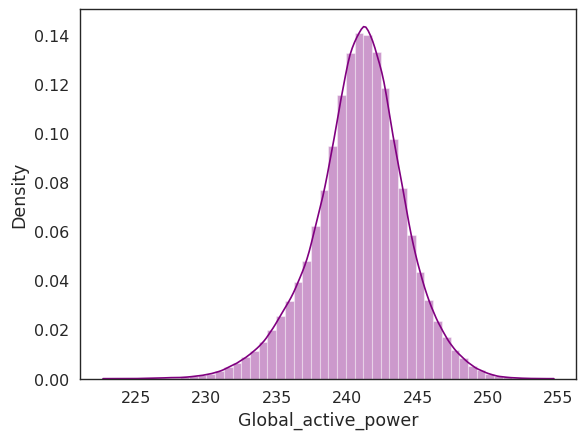

In [ ]:
sns.distplot(data.Global_active_power,color='purple')
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(data.Global_active_power)))
print( 'Skewness of normal distribution: {}'.format(stats.skew(data.Global_active_power)))

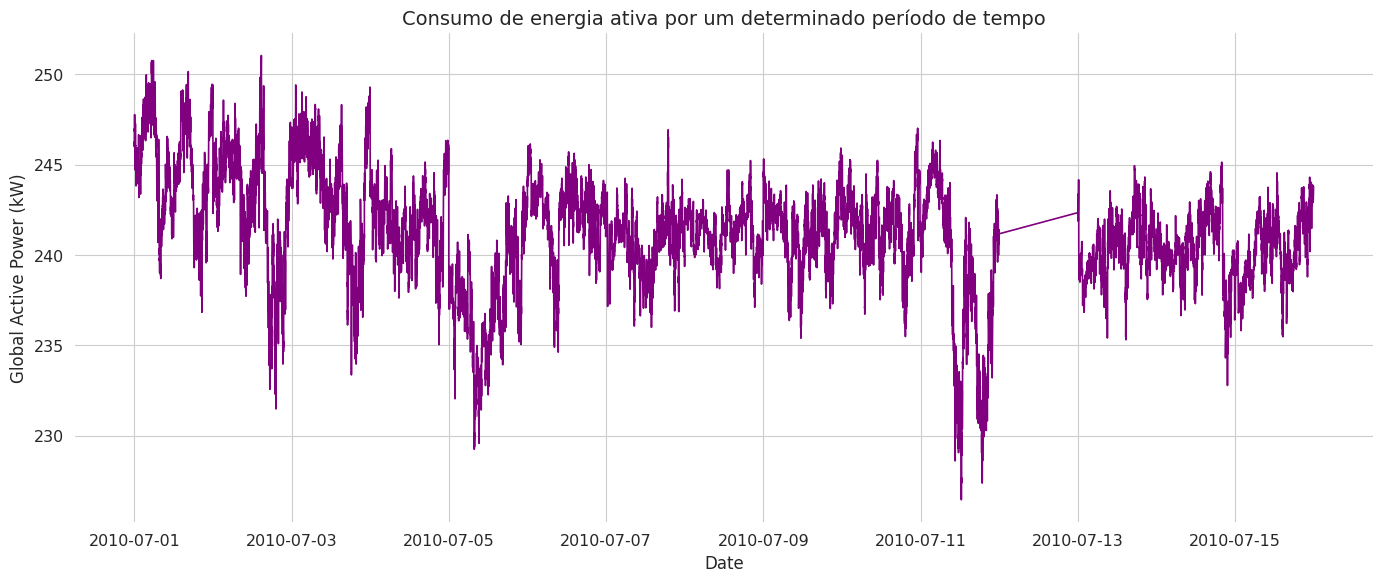

In [ ]:
data1 = data[(data.date_time >= '2010-07-01') & (data.date_time < '2010-7-16')]

plt.figure(figsize=(14,6))
plt.plot(data1.date_time, data1.Global_active_power, color='purple')
plt.ylabel('Global Active Power (kW)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Consumo de energia ativa por um determinado período de tempo', fontsize=14)
plt.tight_layout()
plt.grid(True)
sns.despine(bottom=True, left=True)
plt.show()

Kurtosis of normal distribution: 0.7247023205548917
Skewness of normal distribution: -0.3266647365803846


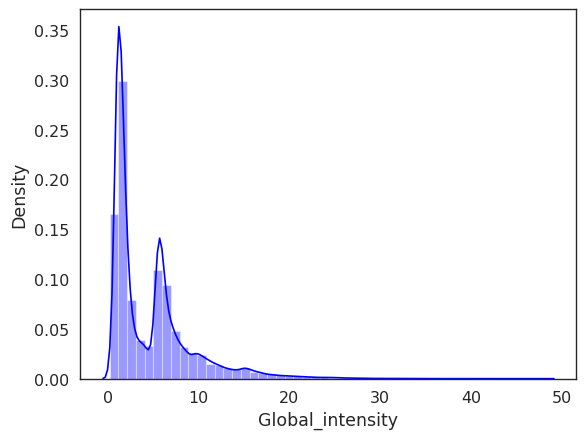

In [ ]:
sns.distplot(data.Global_intensity,color='blue')
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(data.Global_active_power)))
print( 'Skewness of normal distribution: {}'.format(stats.skew(data.Global_active_power)))

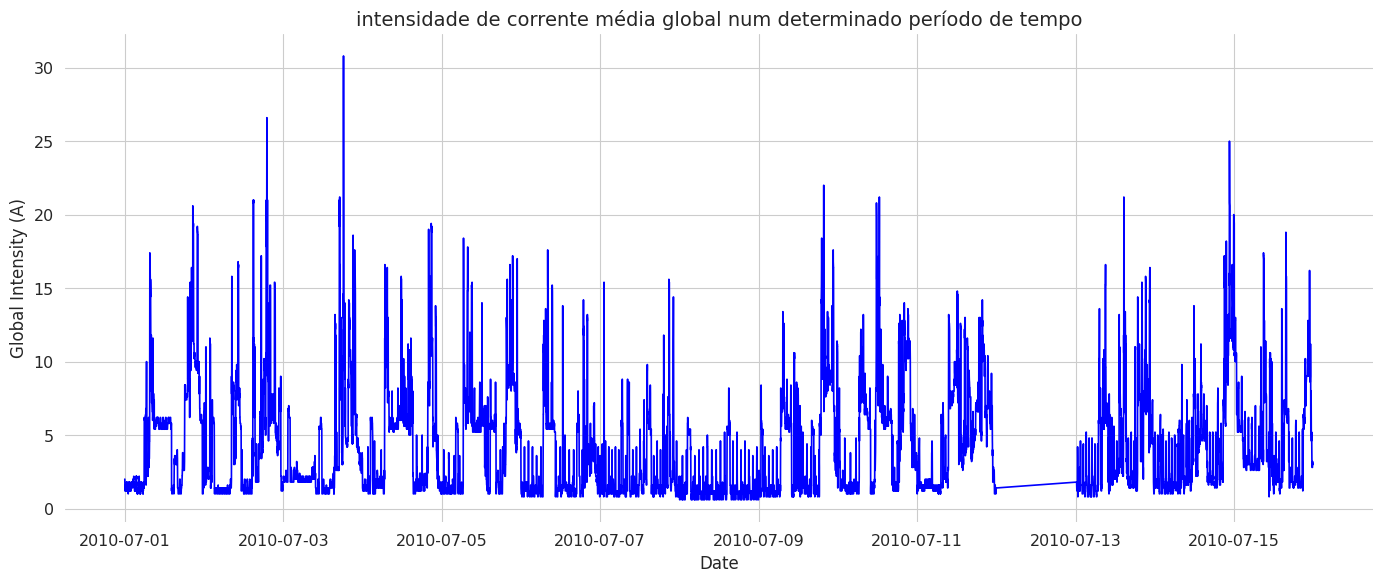

In [ ]:
data2 = data[(data.date_time >= '2010-07-01') & (data.date_time < '2010-7-16')]

plt.figure(figsize=(14,6))
plt.plot(data1.date_time, data2.Global_intensity, color='blue')
plt.ylabel('Global Intensity (A)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('intensidade de corrente média global num determinado período de tempo', fontsize=14)
plt.tight_layout()
plt.grid(True)
sns.despine(bottom=True, left=True)
plt.show()

Kurtosis of normal distribution: 0.7247023205548917
Skewness of normal distribution: -0.3266647365803846


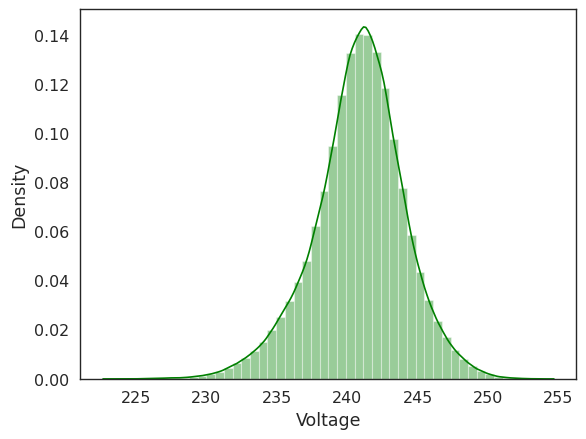

In [ ]:
sns.distplot(data.Voltage,color='green')
print( 'Kurtosis of normal distribution: {}'.format(stats.kurtosis(data.Global_active_power)))
print( 'Skewness of normal distribution: {}'.format(stats.skew(data.Global_active_power)))

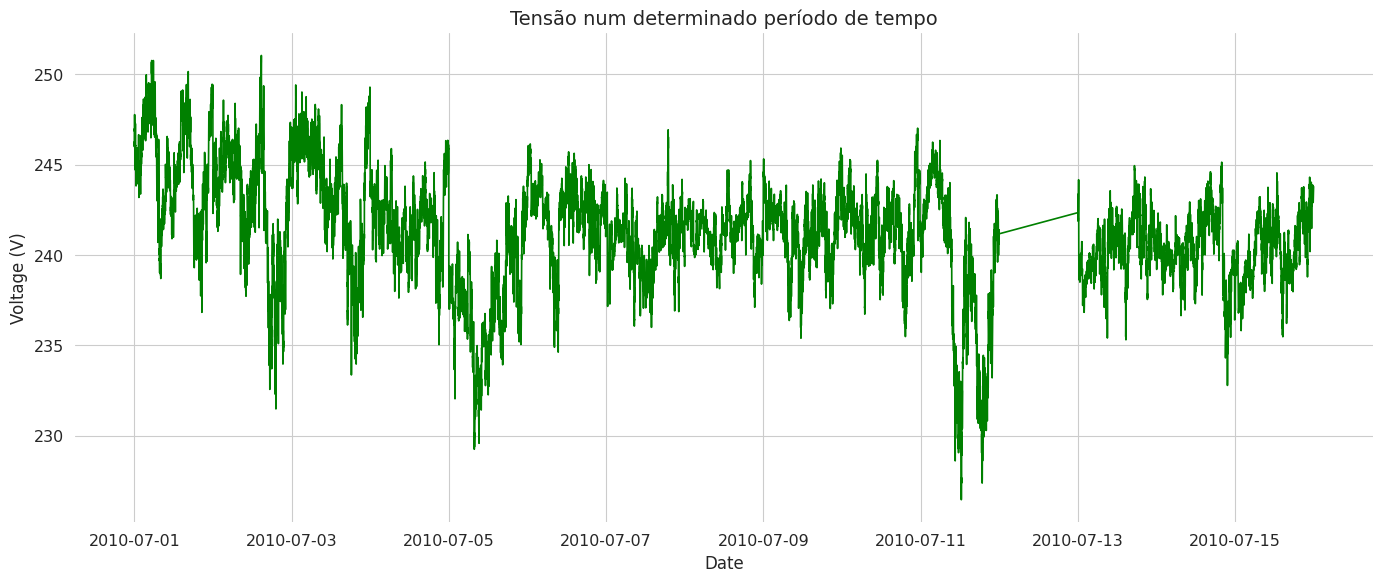

In [ ]:
data3 = data[(data.date_time >= '2010-07-01') & (data.date_time < '2010-7-16')]

plt.figure(figsize=(14,6))
plt.plot(data1.date_time, data3.Voltage, color='green')
plt.ylabel('Voltage (V)', fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.title('Tensão num determinado período de tempo', fontsize=14)
plt.tight_layout()
plt.grid(True)
sns.despine(bottom=True, left=True)
plt.show()

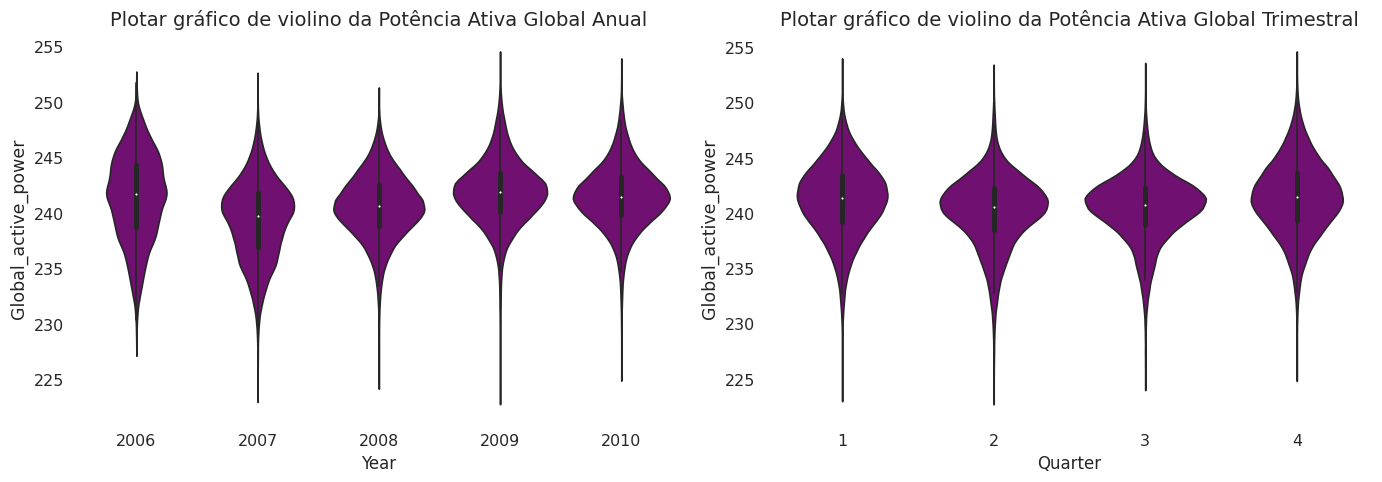

In [ ]:
# Importar bibliotecas necessárias
import matplotlib.pyplot as plt
import seaborn as sns
# Crie uma figura com 2 subtramas
plt.figure(figsize=(14,5))

# Trace a primeira subtrama mostrando o violino do poder ativo global anual
plt.subplot(1,2,1)

# Ajuste a largura da subtrama
plt.subplots_adjust(wspace=0.2)
# Crie o violinplot usando a função violinplot do Seaborn
sns.violinplot(x="year", y="Global_active_power", data=data, color='purple')
# Rotule o eixo x
plt.xlabel('Year', fontsize=12)
# Adicione um título ao enredo
plt.title('Plotar gráfico de violino da Potência Ativa Global Anual', fontsize=14)
# Remova a crista superior e direita do gráfico
sns.despine(left=True, bottom=True)
# Adicione um layout compacto ao gráfico
plt.tight_layout()

# Trace a segunda subtrama mostrando o violinplot do poder ativo global trimestral
plt.subplot(1,2,2)
# Crie o violinplot usando a função violinplot do Seaborn
sns.violinplot(x="quarter", y="Global_active_power", data=data, color='purple')

# Rotule o eixo x
plt.xlabel('Quarter', fontsize=12)
# Adicione um título ao enredo
plt.title('Plotar gráfico de violino da Potência Ativa Global Trimestral', fontsize=14)
# Remova a crista superior e direita do gráfico
sns.despine(left=True, bottom=True)
# Adicione um layout compacto ao gráfico
plt.tight_layout()

                         count      mean    std       min       25%       50%  \
Global_active_power 20159.0000  241.2364 3.1113  226.4700  239.6600  241.3900   
Global_intensity    20159.0000    4.1622 3.6074    0.6000    1.4000    2.6000   
Voltage             20159.0000  241.2364 3.1113  226.4700  239.6600  241.3900   
year                20159.0000 2010.0000 0.0000 2010.0000 2010.0000 2010.0000   
quarter             20159.0000    3.0000 0.0000    3.0000    3.0000    3.0000   
month               20159.0000    7.0000 0.0000    7.0000    7.0000    7.0000   
day                 20159.0000    7.7139 4.3330    1.0000    4.0000    7.0000   
weekday             20159.0000    0.7143 0.4518    0.0000    0.0000    1.0000   

                          75%       max  
Global_active_power  242.9500  251.0300  
Global_intensity       6.0000   30.8000  
Voltage              242.9500  251.0300  
year                2010.0000 2010.0000  
quarter                3.0000    3.0000  
month             

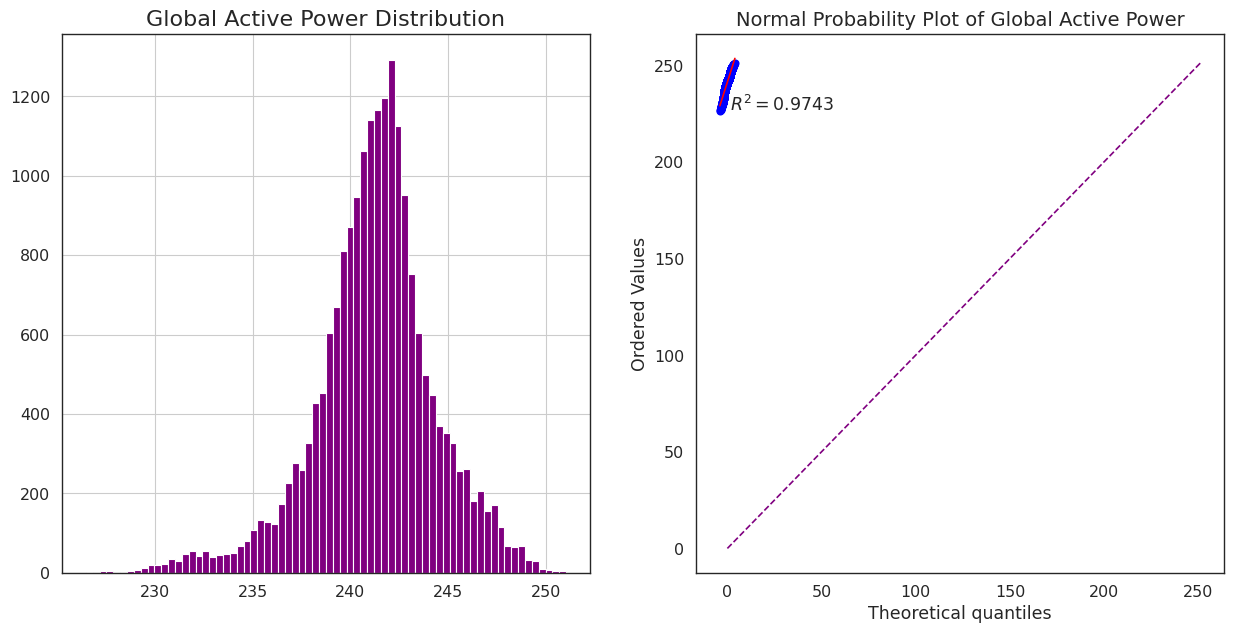

In [ ]:
# Traçando o histograma e o gráfico de probabilidade normal para a coluna 'Global_active_power'
plt.figure(figsize=(15,7))

# Histograma da coluna 'Global_active_power'
plt.subplot(1,2,1)
data1['Global_active_power'].hist(bins=70, color='purple')
plt.title('Global Active Power Distribution', fontsize=16)

# Gráfico de probabilidade normal da coluna 'Global_active_power'
plt.subplot(1,2,2)
# Crie o gráfico de probabilidade normal usando stats.probplo
stats.probplot(data1['Global_active_power'], plot=plt, fit=True, rvalue=True)
# Adicione uma linha ao gráfico
plt.plot([0, max(data1['Global_active_power'])], [0, max(data1['Global_active_power'])], color='purple', linestyle='--')
plt.title('Normal Probability Plot of Global Active Power', fontsize=14)


# Exibindo as estatísticas resumidas da coluna 'Global_active_power'
print(data1.describe().T)

                         count      mean    std       min       25%       50%  \
Global_active_power 20159.0000  241.2364 3.1113  226.4700  239.6600  241.3900   
Global_intensity    20159.0000    4.1622 3.6074    0.6000    1.4000    2.6000   
Voltage             20159.0000  241.2364 3.1113  226.4700  239.6600  241.3900   
year                20159.0000 2010.0000 0.0000 2010.0000 2010.0000 2010.0000   
quarter             20159.0000    3.0000 0.0000    3.0000    3.0000    3.0000   
month               20159.0000    7.0000 0.0000    7.0000    7.0000    7.0000   
day                 20159.0000    7.7139 4.3330    1.0000    4.0000    7.0000   
weekday             20159.0000    0.7143 0.4518    0.0000    0.0000    1.0000   

                          75%       max  
Global_active_power  242.9500  251.0300  
Global_intensity       6.0000   30.8000  
Voltage              242.9500  251.0300  
year                2010.0000 2010.0000  
quarter                3.0000    3.0000  
month             

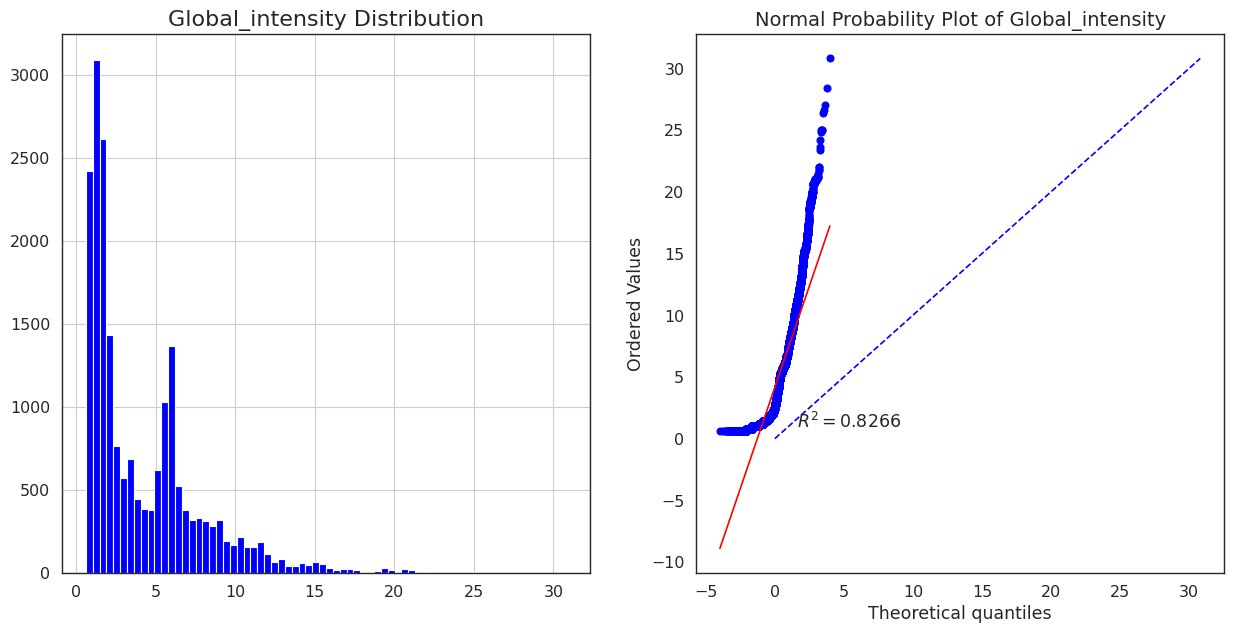

In [ ]:
# Traçando o histograma e o gráfico de probabilidade normal para a coluna 'Global_itensity'
plt.figure(figsize=(15,7))

# Histograma da coluna 'Global_intensity'
plt.subplot(1,2,1)
data2['Global_intensity'].hist(bins=70, color='blue')
plt.title('Global_intensity Distribution', fontsize=16)

# Gráfico de probabilidade normal da coluna 'Global_active_power'
plt.subplot(1,2,2)
# Crie o gráfico de probabilidade normal usando stats.probplo
stats.probplot(data1['Global_intensity'], plot=plt, fit=True, rvalue=True)
# Adicione uma linha ao gráfico
plt.plot([0, max(data1['Global_intensity'])], [0, max(data1['Global_intensity'])], color='blue', linestyle='--')
plt.title('Normal Probability Plot of Global_intensity', fontsize=14)


# Exibindo as estatísticas resumidas da coluna 'Global_intensity'
print(data2.describe().T)

                         count      mean    std       min       25%       50%  \
Global_active_power 20159.0000  241.2364 3.1113  226.4700  239.6600  241.3900   
Global_intensity    20159.0000    4.1622 3.6074    0.6000    1.4000    2.6000   
Voltage             20159.0000  241.2364 3.1113  226.4700  239.6600  241.3900   
year                20159.0000 2010.0000 0.0000 2010.0000 2010.0000 2010.0000   
quarter             20159.0000    3.0000 0.0000    3.0000    3.0000    3.0000   
month               20159.0000    7.0000 0.0000    7.0000    7.0000    7.0000   
day                 20159.0000    7.7139 4.3330    1.0000    4.0000    7.0000   
weekday             20159.0000    0.7143 0.4518    0.0000    0.0000    1.0000   

                          75%       max  
Global_active_power  242.9500  251.0300  
Global_intensity       6.0000   30.8000  
Voltage              242.9500  251.0300  
year                2010.0000 2010.0000  
quarter                3.0000    3.0000  
month             

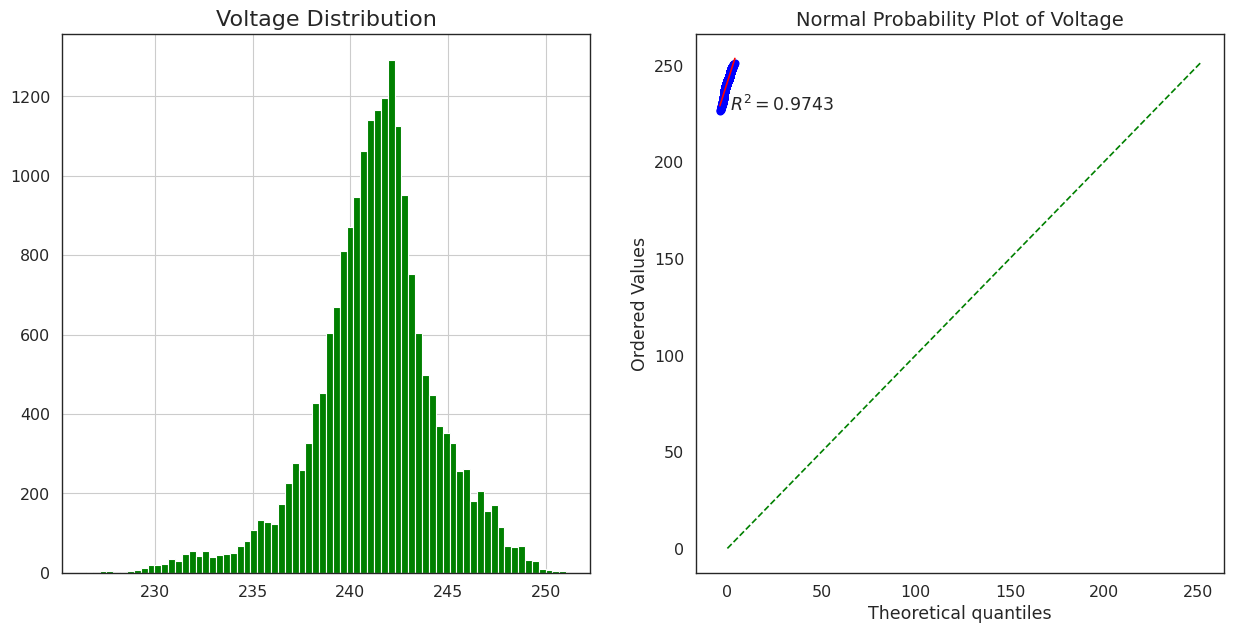

In [ ]:
# Traçando o histograma e o gráfico de probabilidade normal para a coluna 'Voltage'
plt.figure(figsize=(15,7))

# Histograma da coluna 'Voltage'
plt.subplot(1,2,1)
data3['Voltage'].hist(bins=70, color='green')
plt.title('Voltage Distribution', fontsize=16)

# Gráfico de probabilidade normal da coluna 'Global_active_power'
plt.subplot(1,2,2)
# Crie o gráfico de probabilidade normal usando stats.probplo
stats.probplot(data1['Voltage'], plot=plt, fit=True, rvalue=True)
# Adicione uma linha ao gráfico
plt.plot([0, max(data1['Voltage'])], [0, max(data1['Voltage'])], color='green', linestyle='--')
plt.title('Normal Probability Plot of Voltage', fontsize=14)


# Exibindo as estatísticas resumidas da coluna 'Voltage'
print(data3.describe().T)

In [ ]:
data1=data.loc[:,['date_time','Global_active_power']]
data1.set_index('date_time',inplace=True)

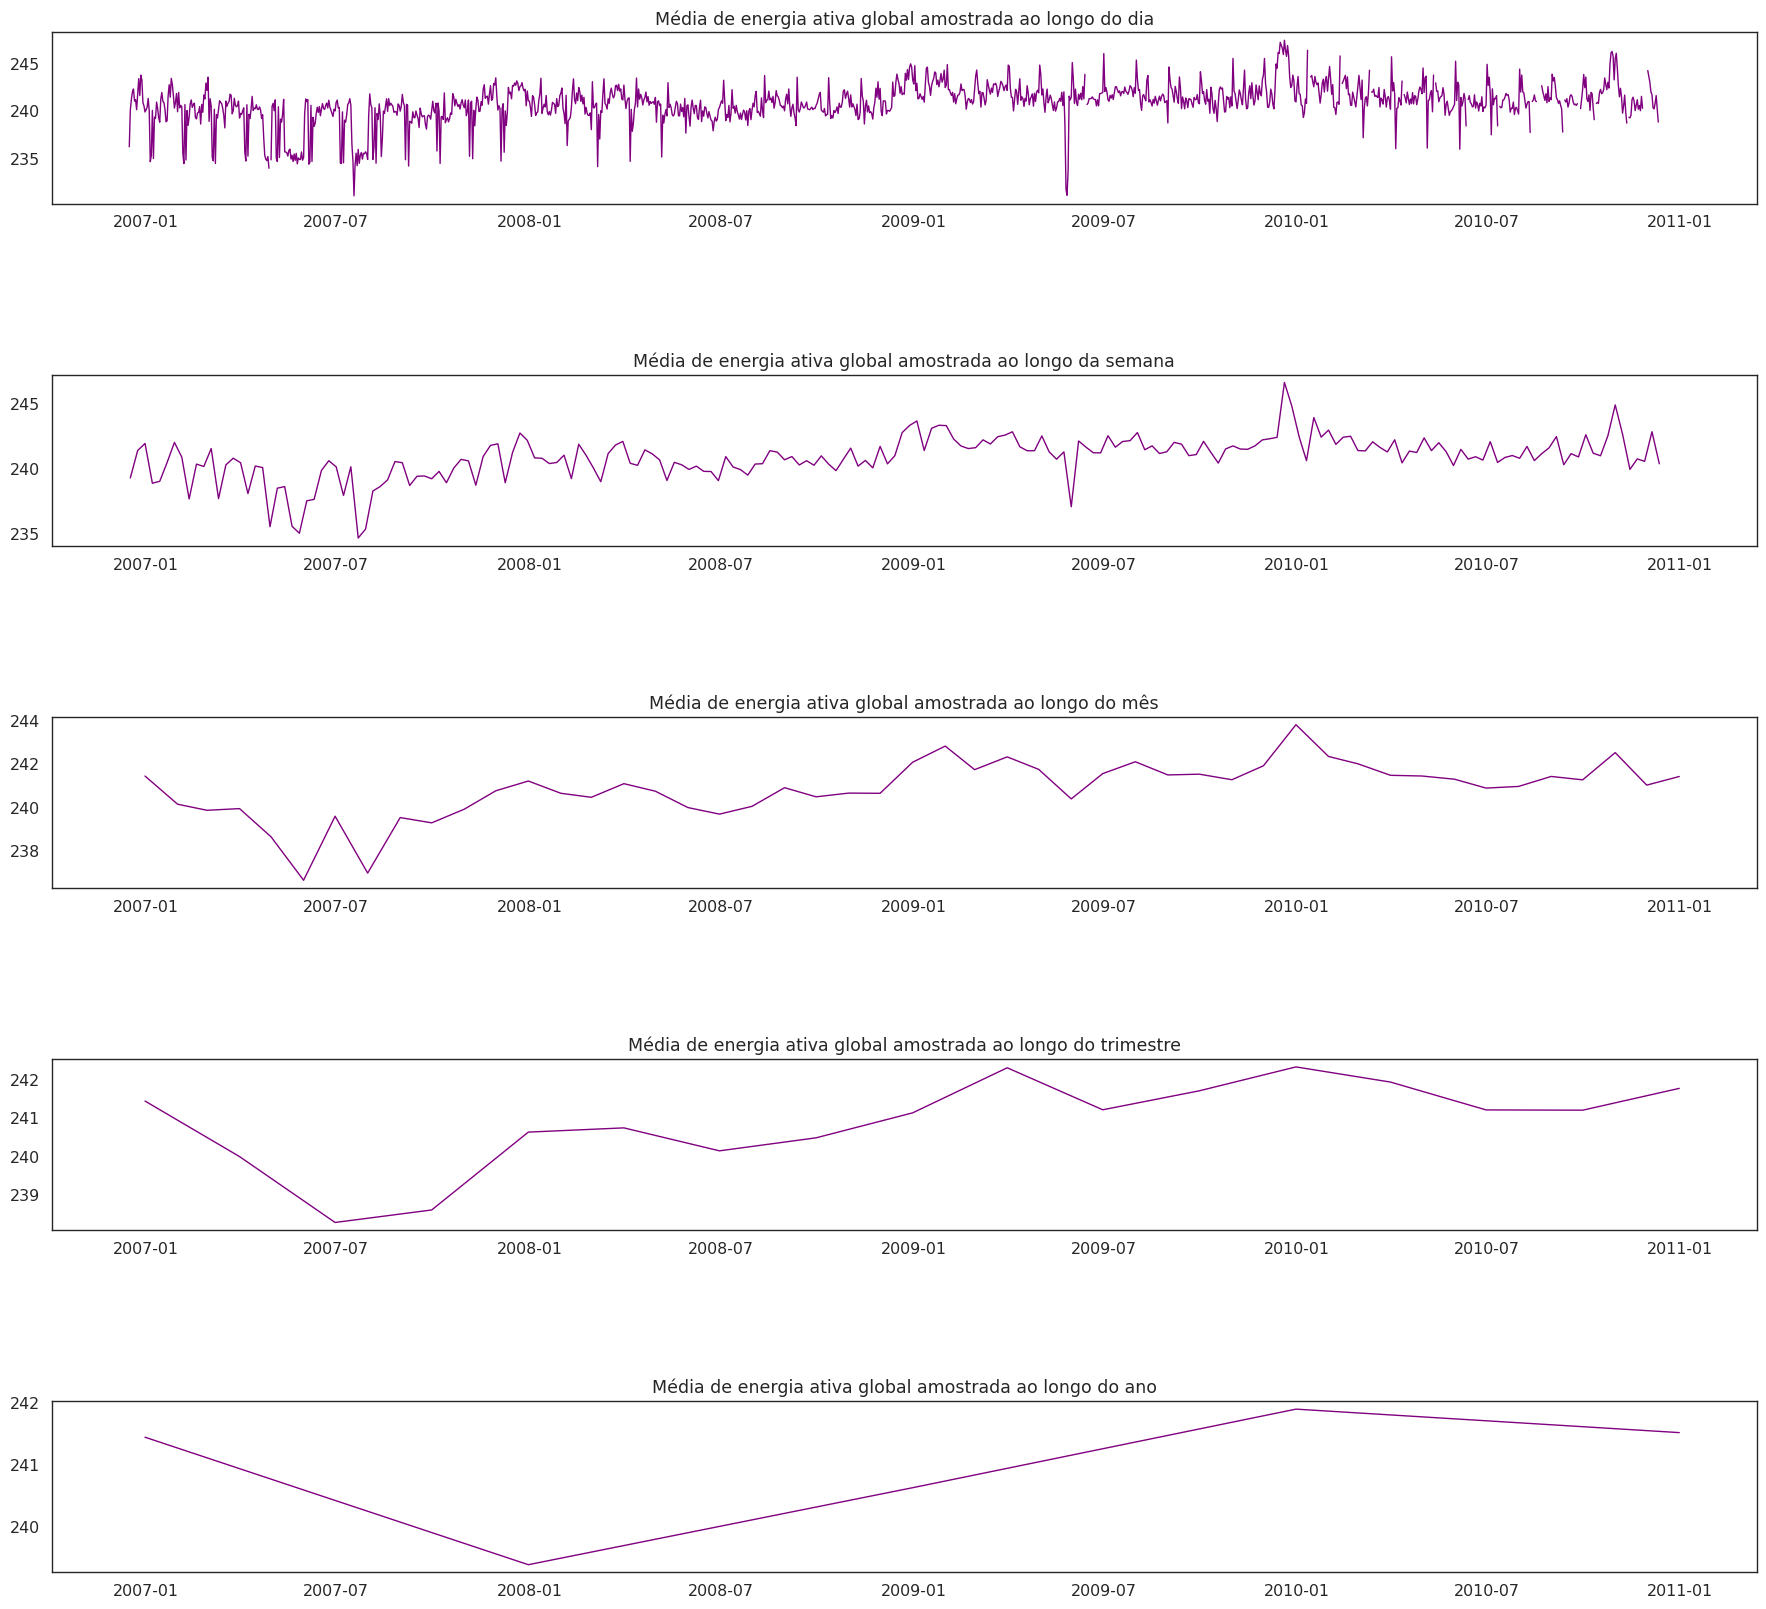

In [ ]:
# Cria uma figura com tamanho especificado
fig = plt.figure(figsize=(22, 20))
# Ajusta o espaçamento entre as subtramas
fig.subplots_adjust(hspace=1)

# Cria a primeira subtrama
ax1 = fig.add_subplot(5, 1, 1)
# Plota a média ressampled de Global_active_power ao longo do dia com cor diferente
ax1.plot(data1['Global_active_power'].resample('D').mean(), linewidth=1, color='purple')
# Define o título para a subtrama
ax1.set_title('Média de energia ativa global amostrada ao longo do dia')
# Define os parâmetros principais do tick para a subtrama
ax1.tick_params(axis='both', which='major')

# Cria a segunda subtrama
ax2 = fig.add_subplot(5, 1, 2, sharex=ax1)
# Plota a média ressampled de Global_active_power ao longo da semana com cor diferente
ax2.plot(data1['Global_active_power'].resample('W').mean(), linewidth=1, color='purple')
# Define o título para a subtrama
ax2.set_title('Média de energia ativa global amostrada ao longo da semana')
# Define os parâmetros principais do tick para a subtrama
ax2.tick_params(axis='both', which='major')

# Cria a terceira subtrama
ax3 = fig.add_subplot(5, 1, 3, sharex=ax1)
# Plota a média ressampled de Global_active_power ao longo do mês com cor diferente
ax3.plot(data1['Global_active_power'].resample('M').mean(), linewidth=1, color='purple')
# Define o título para a subtrama
ax3.set_title('Média de energia ativa global amostrada ao longo do mês')
# Define os parâmetros principais do tick para a subtrama
ax3.tick_params(axis='both', which='major')

# Cria a quarta subtrama
ax4 = fig.add_subplot(5, 1, 4, sharex=ax1)
# Plota a média ressampled de Global_active_power ao longo do trimestre com cor diferente
ax4.plot(data1['Global_active_power'].resample('Q').mean(), linewidth=1, color='purple')
# Define o título para a subtrama
ax4.set_title('Média de energia ativa global amostrada ao longo do trimestre')
# Define os parâmetros principais do tick para a subtrama
ax4.tick_params(axis='both', which='major')

# Cria a quinta subtrama
ax5 = fig.add_subplot(5, 1, 5, sharex=ax1)
# Plota a média ressampled de Global_active_power ao longo do ano com cor diferente
ax5.plot(data1['Global_active_power'].resample('A').mean(), linewidth=1, color='purple')
# Define o título para a subtrama
ax5.set_title('Média de energia ativa global amostrada ao longo do ano')
# Define os parâmetros principais do tick para a subtrama
ax5.tick_params(axis='both', which='major')


In [ ]:
data2=data.loc[:,['date_time','Global_intensity']]
data2.set_index('date_time',inplace=True)

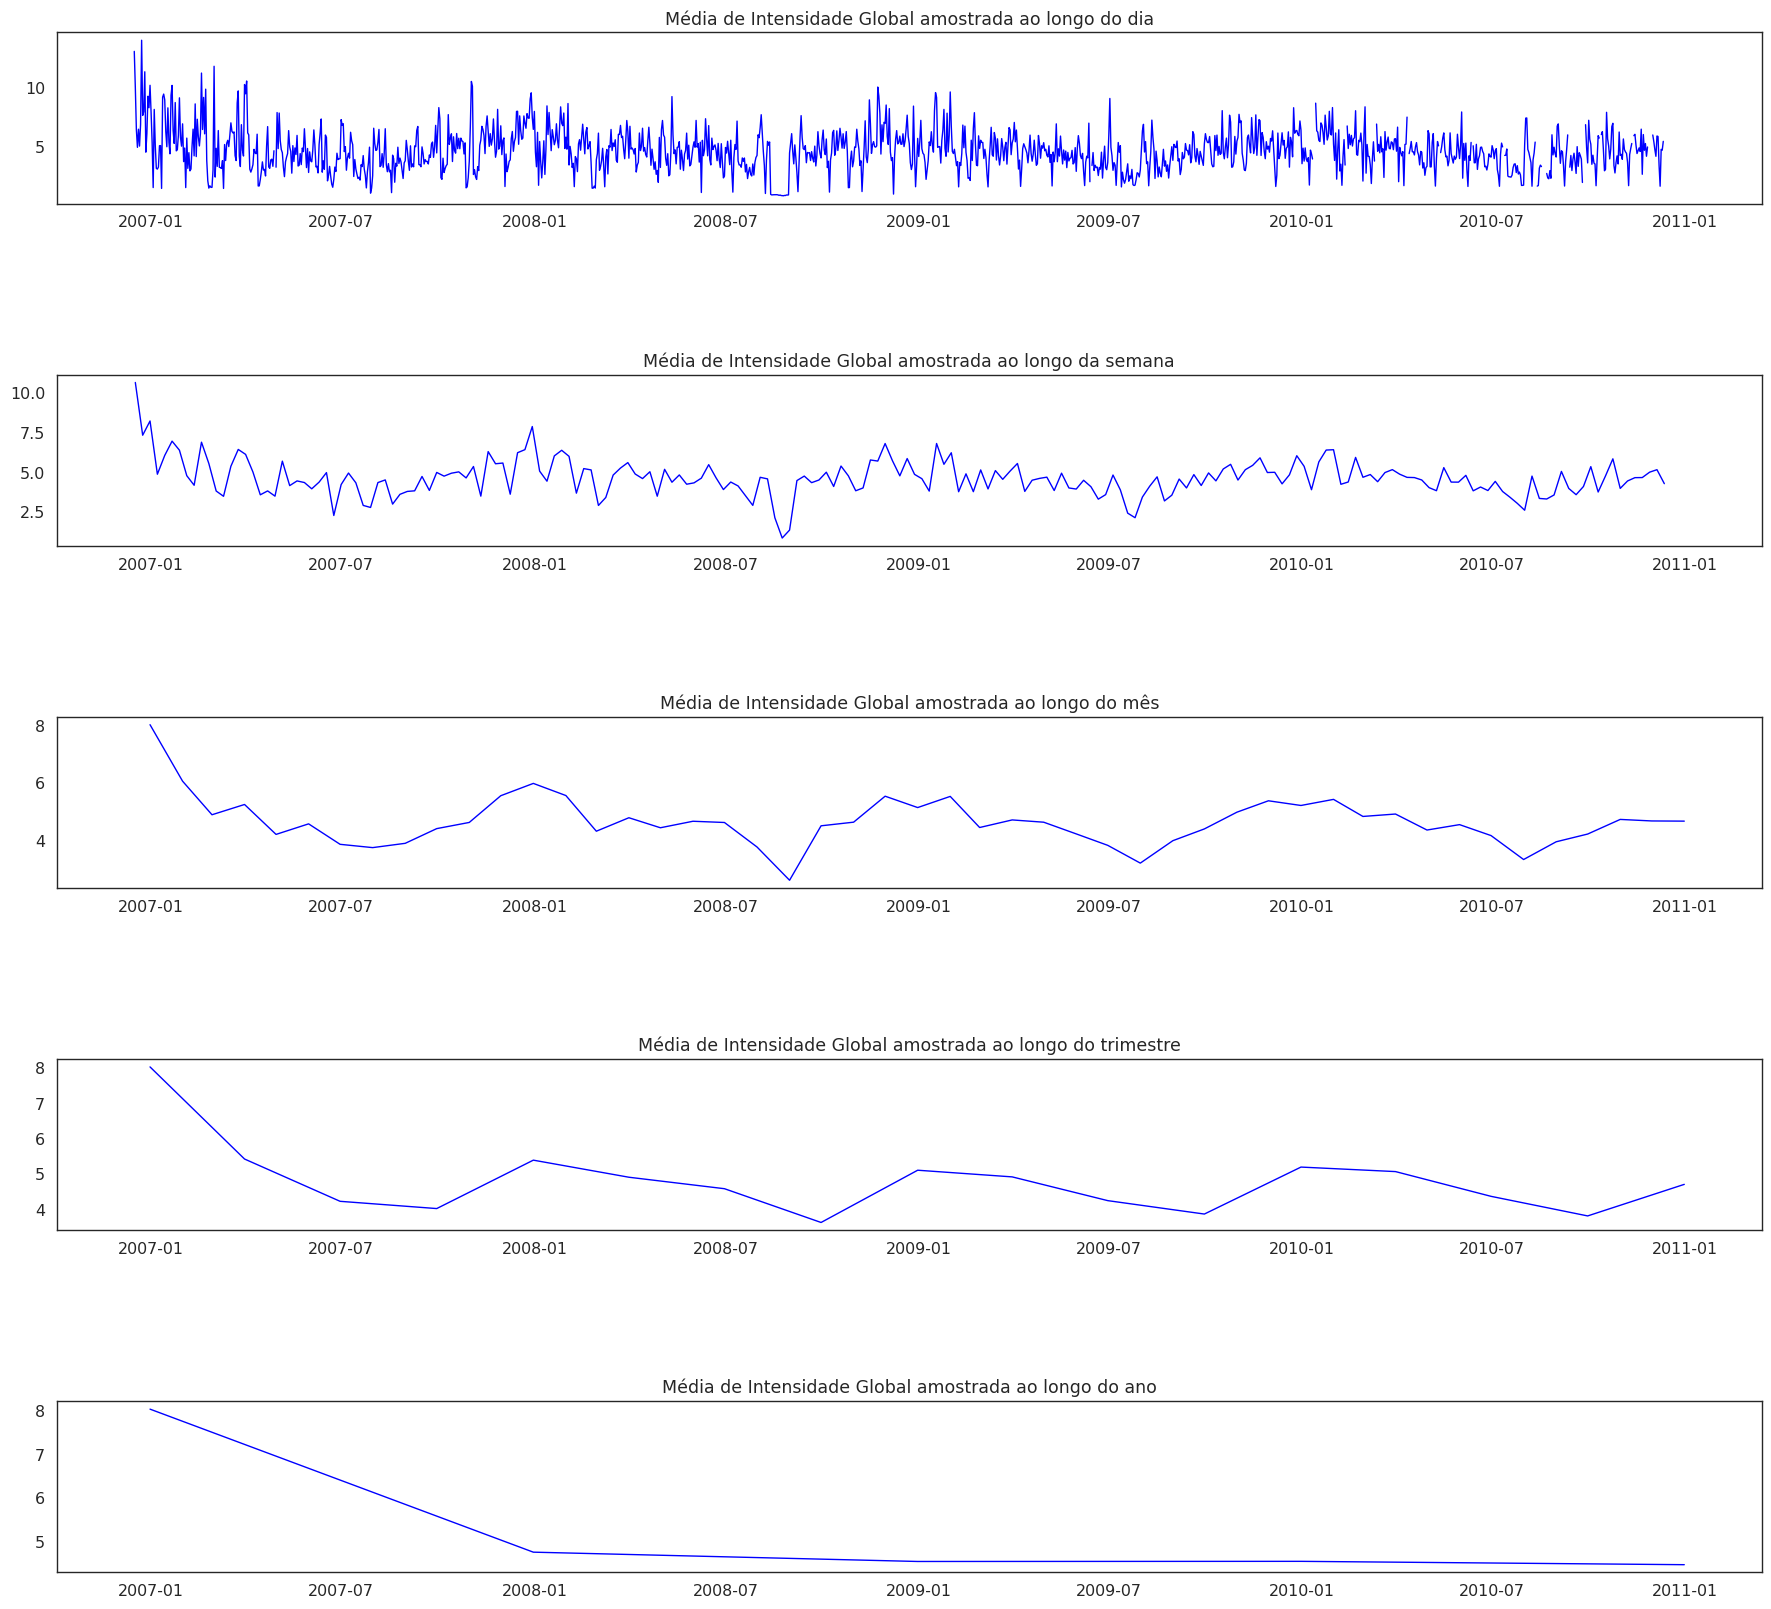

In [ ]:
# Cria uma figura com tamanho especificado
fig = plt.figure(figsize=(22, 20))
# Ajusta o espaçamento entre as subtramas
fig.subplots_adjust(hspace=1)

# Cria a primeira subtrama
ax1 = fig.add_subplot(5, 1, 1)
# Plota a média ressampled de Global_intensity ao longo do dia com cor diferente
ax1.plot(data2['Global_intensity'].resample('D').mean(), linewidth=1, color='blue')
# Define o título para a subtrama
ax1.set_title('Média de Intensidade Global amostrada ao longo do dia')
# Define os parâmetros principais do tick para a subtrama
ax1.tick_params(axis='both', which='major')

# Cria a segunda subtrama
ax2 = fig.add_subplot(5, 1, 2, sharex=ax1)
# Plota a média ressampled de Global_intensity ao longo da semana com cor diferente
ax2.plot(data2['Global_intensity'].resample('W').mean(), linewidth=1, color='blue')
# Define o título para a subtrama
ax2.set_title('Média de Intensidade Global amostrada ao longo da semana')
# Define os parâmetros principais do tick para a subtrama
ax2.tick_params(axis='both', which='major')

# Cria a terceira subtrama
ax3 = fig.add_subplot(5, 1, 3, sharex=ax1)
# Plota a média ressampled de Global_intensity ao longo do mês com cor diferente
ax3.plot(data2['Global_intensity'].resample('M').mean(), linewidth=1, color='blue')
# Define o título para a subtrama
ax3.set_title('Média de Intensidade Global amostrada ao longo do mês')
# Define os parâmetros principais do tick para a subtrama
ax3.tick_params(axis='both', which='major')

# Cria a quarta subtrama
ax4 = fig.add_subplot(5, 1, 4, sharex=ax1)
# Plota a média ressampled de Global_intensity ao longo do trimestre com cor diferente
ax4.plot(data2['Global_intensity'].resample('Q').mean(), linewidth=1, color='blue')
# Define o título para a subtrama
ax4.set_title('Média de Intensidade Global amostrada ao longo do trimestre')
# Define os parâmetros principais do tick para a subtrama
ax4.tick_params(axis='both', which='major')

# Cria a quinta subtrama
ax5 = fig.add_subplot(5, 1, 5, sharex=ax1)
# Plota a média ressampled de Global_intensity ao longo do ano com cor diferente
ax5.plot(data2['Global_intensity'].resample('A').mean(), linewidth=1, color='blue')
# Define o título para a subtrama
ax5.set_title('Média de Intensidade Global amostrada ao longo do ano')
# Define os parâmetros principais do tick para a subtrama
ax5.tick_params(axis='both', which='major')

In [ ]:
data3=data.loc[:,['date_time','Voltage']]
data3.set_index('date_time',inplace=True)

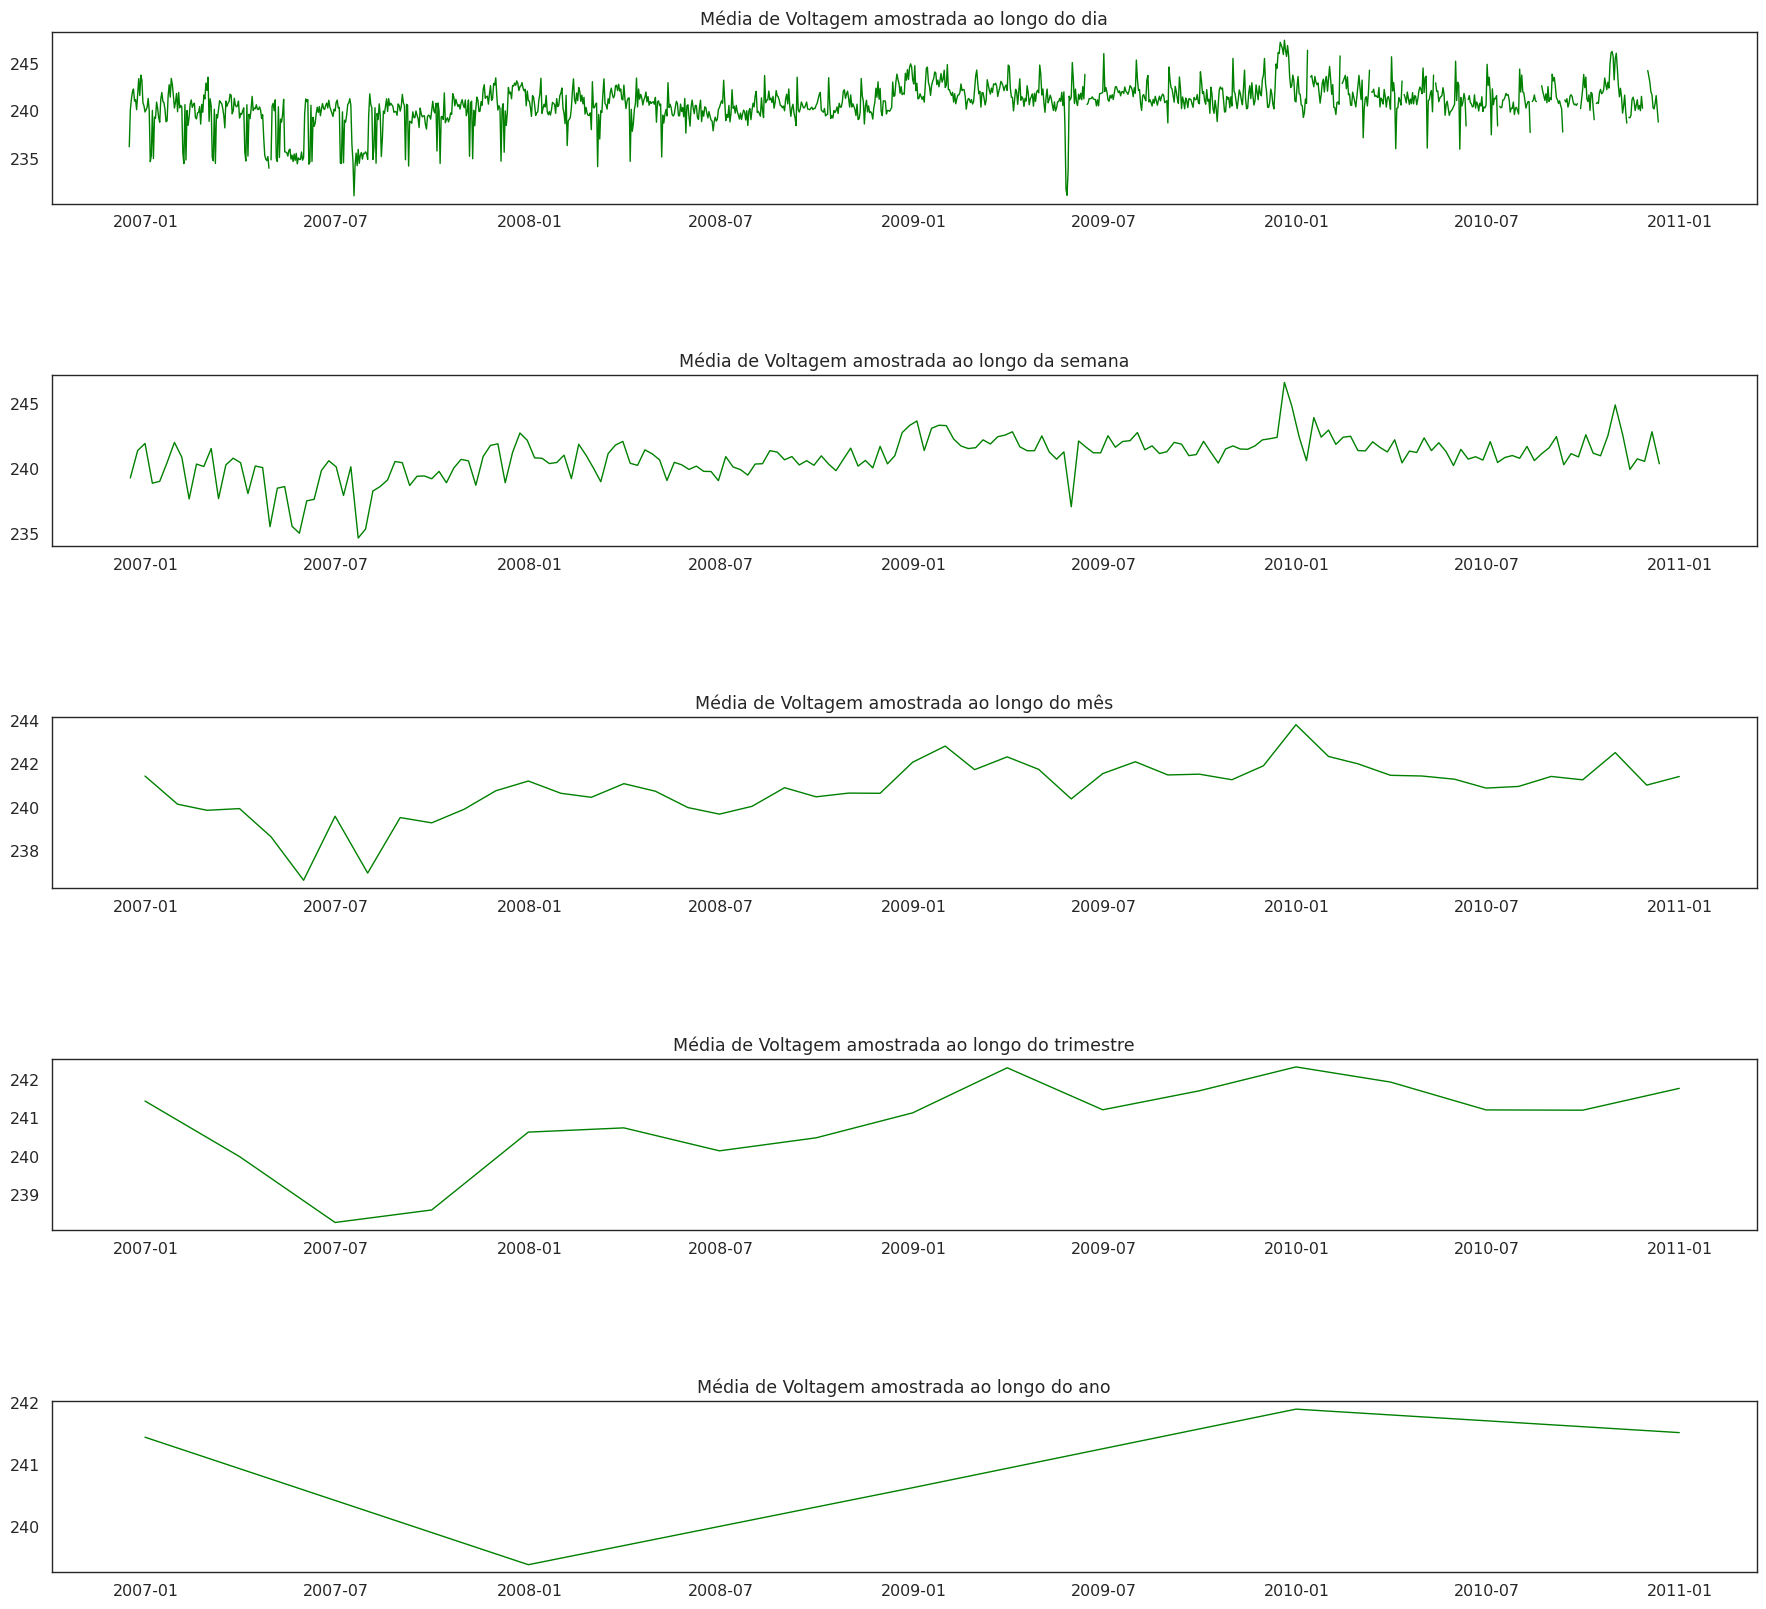

In [ ]:
# Cria uma figura com tamanho especificado
fig = plt.figure(figsize=(22, 20))
# Ajusta o espaçamento entre as subtramas
fig.subplots_adjust(hspace=1)

# Cria a primeira subtrama
ax1 = fig.add_subplot(5, 1, 1)
# Plota a média ressampled de Voltage ao longo do dia com cor diferente
ax1.plot(data3['Voltage'].resample('D').mean(), linewidth=1, color='green')
# Define o título para a subtrama
ax1.set_title('Média de Voltagem amostrada ao longo do dia')
# Define os parâmetros principais do tick para a subtrama
ax1.tick_params(axis='both', which='major')

# Cria a segunda subtrama
ax2 = fig.add_subplot(5, 1, 2, sharex=ax1)
# Plota a média ressampled de Voltage ao longo da semana com cor diferente
ax2.plot(data3['Voltage'].resample('W').mean(), linewidth=1, color='green')
# Define o título para a subtrama
ax2.set_title('Média de Voltagem amostrada ao longo da semana')
# Define os parâmetros principais do tick para a subtrama
ax2.tick_params(axis='both', which='major')

# Cria a terceira subtrama
ax3 = fig.add_subplot(5, 1, 3, sharex=ax1)
# Plota a média ressampled de Voltage ao longo do mês com cor diferente
ax3.plot(data3['Voltage'].resample('M').mean(), linewidth=1, color='green')
# Define o título para a subtrama
ax3.set_title('Média de Voltagem amostrada ao longo do mês')
# Define os parâmetros principais do tick para a subtrama
ax3.tick_params(axis='both', which='major')

# Cria a quarta subtrama
ax4 = fig.add_subplot(5, 1, 4, sharex=ax1)
# Plota a média ressampled de Voltage ao longo do trimestre com cor diferente
ax4.plot(data3['Voltage'].resample('Q').mean(), linewidth=1, color='green')
# Define o título para a subtrama
ax4.set_title('Média de Voltagem amostrada ao longo do trimestre')
# Define os parâmetros principais do tick para a subtrama
ax4.tick_params(axis='both', which='major')

# Cria a quinta subtrama
ax5 = fig.add_subplot(5, 1, 5, sharex=ax1)
# Plota a média ressampled de Voltage ao longo do ano com cor diferente
ax5.plot(data3['Voltage'].resample('A').mean(), linewidth=1, color='green')
# Define o título para a subtrama
ax5.set_title('Média de Voltagem amostrada ao longo do ano')
# Define os parâmetros principais do tick para a subtrama
ax5.tick_params(axis='both', which='major')


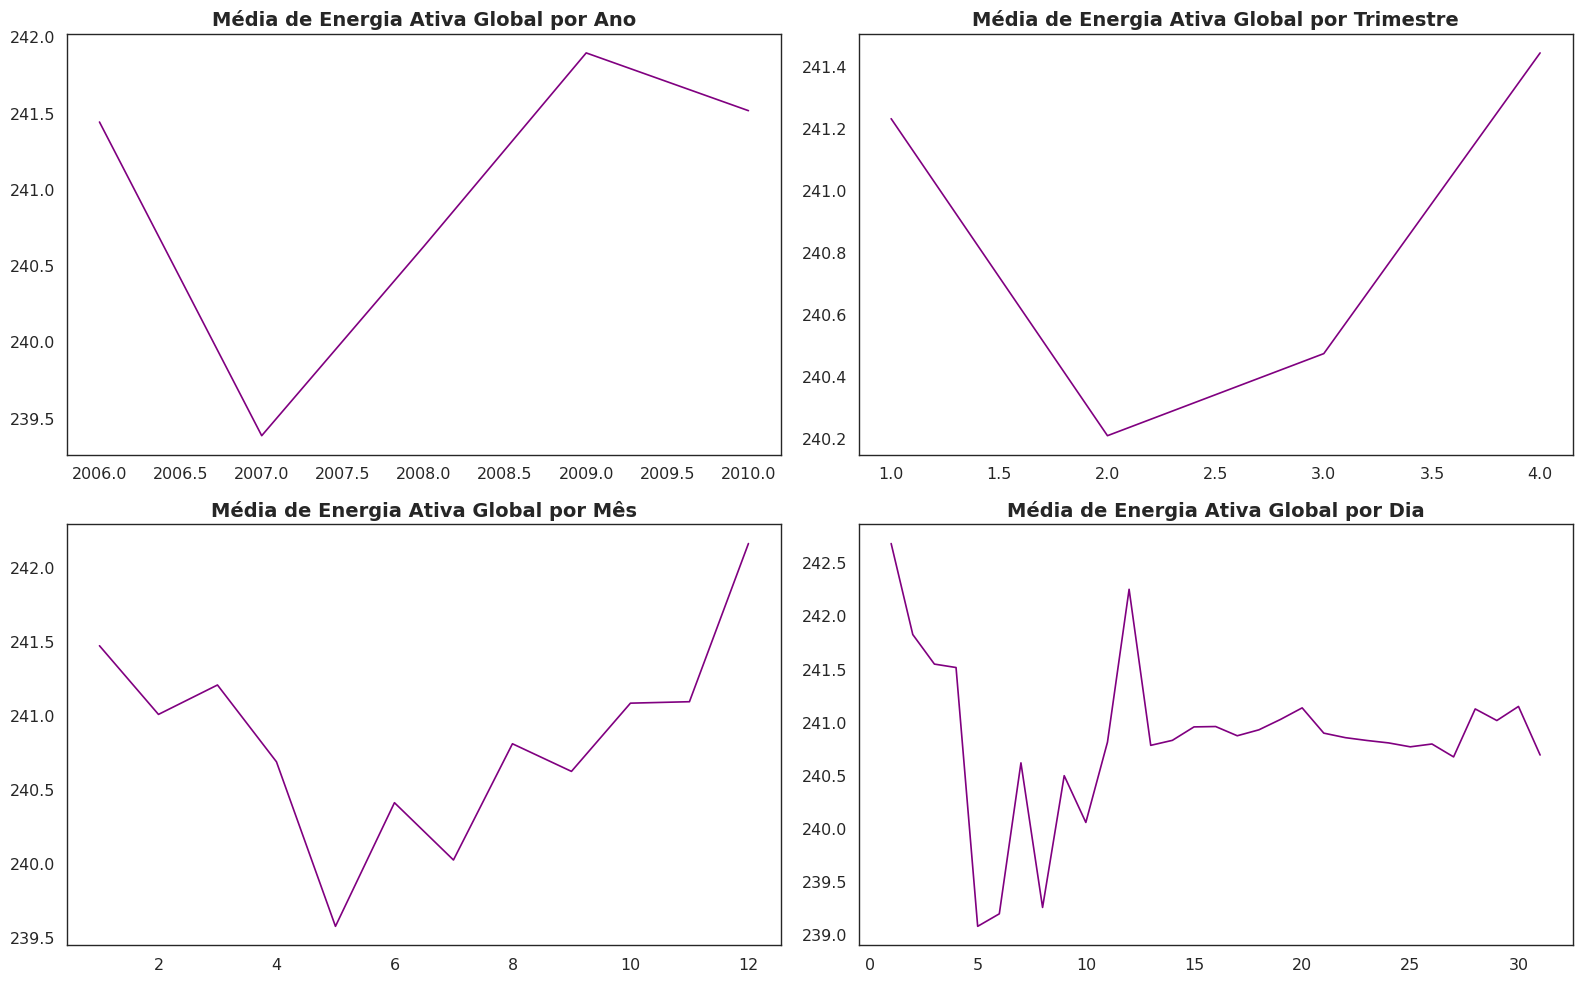

In [ ]:
# Importa a biblioteca matplotlib para traçar gráficos
import matplotlib.pyplot as plt

# Cria uma figura com 2 linhas e 2 colunas e ajusta seu tamanho para 16x10
plt.figure(figsize=(16, 10))

# Primeira subtrama na primeira linha, primeira coluna
plt.subplot(2, 2, 1)

# Agrupa os dados por ano e calcula a média da coluna 'Global_active_power'
grouped_by_year = data.groupby('year').Global_active_power.agg('mean')

# Plota a média de 'Global_active_power' por ano com cor roxa
grouped_by_year.plot(color='purple')

# Define o rótulo x como vazio
plt.xlabel('')

# Define o título como 'Média de Energia Ativa Global por Ano' com tamanho de fonte 12 e peso da fonte 'negrito'
plt.title('Média de Energia Ativa Global por Ano', fontsize=14, fontweight='bold')

# Segunda subtrama na primeira linha, segunda coluna
plt.subplot(2, 2, 2)

# Agrupa os dados por trimestre e calcula a média da coluna 'Global_active_power'
grouped_by_quarter = data.groupby('quarter').Global_active_power.agg('mean')

# Plota a média de 'Global_active_power' por trimestre com cor roxa
grouped_by_quarter.plot(color='purple')

# Define o rótulo x como vazio
plt.xlabel('')

# Define o título como 'Média de Energia Ativa Global por Trimestre' com tamanho de fonte 12 e peso da fonte 'negrito'
plt.title('Média de Energia Ativa Global por Trimestre', fontsize=14, fontweight='bold')

# Terceira subtrama na segunda linha, primeira coluna
plt.subplot(2, 2, 3)

# Agrupa os dados por mês e calcula a média da coluna 'Global_active_power'
grouped_by_month = data.groupby('month').Global_active_power.agg('mean')

# Plota a média de 'Global_active_power' por mês com cor roxa
grouped_by_month.plot(color='purple')

# Define o rótulo x como vazio
plt.xlabel('')

# Define o título como 'Média de Energia Ativa Global por Mês' com tamanho de fonte 12 e peso da fonte 'negrito'
plt.title('Média de Energia Ativa Global por Mês', fontsize=14, fontweight='bold')

# Quarta subtrama na segunda linha, segunda coluna
plt.subplot(2, 2, 4)

# Agrupa os dados por dia e calcula a média da coluna 'Global_active_power'
grouped_by_day = data.groupby('day').Global_active_power.agg('mean')

# Plota a média de 'Global_active_power' por dia com cor roxa
grouped_by_day.plot(color='purple')

# Define o rótulo x como vazio
plt.xlabel('')

# Define o título como 'Média de Energia Ativa Global por Dia' com tamanho de fonte 12 e peso da fonte 'negrito'
plt.title('Média de Energia Ativa Global por Dia', fontsize=14, fontweight='bold')

# Usa tight_layout para ajustar as subtramas para que se encaixem na área da figura
plt.tight_layout()

# Mostra o gráfico
plt.show()


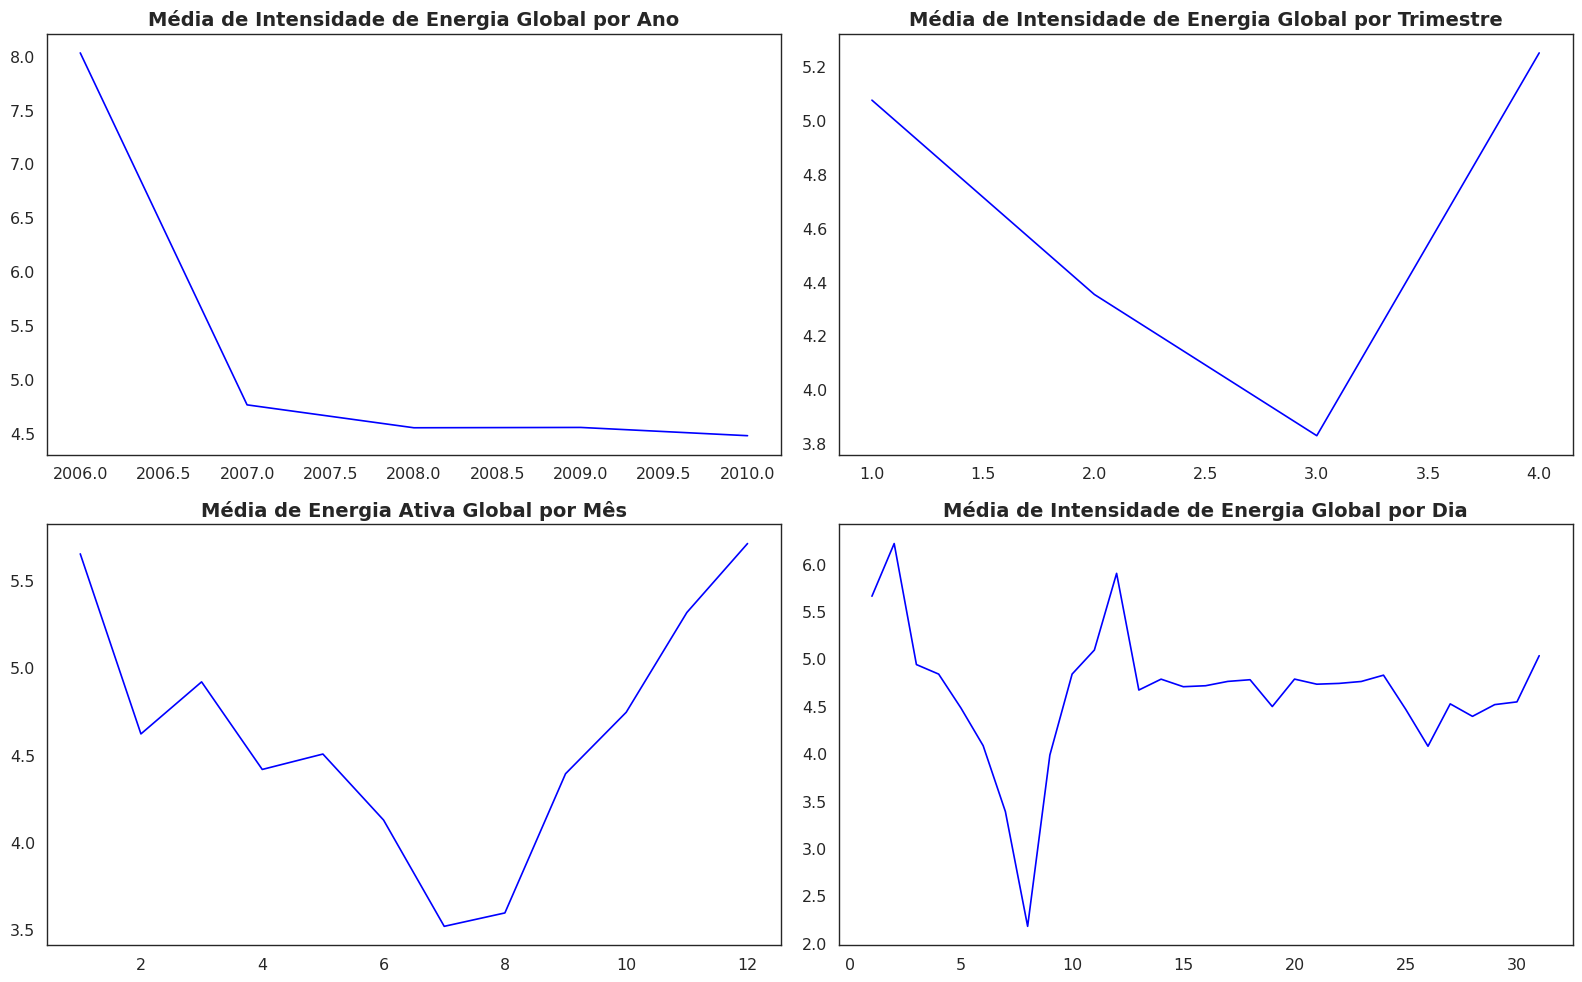

In [ ]:
# Importa a biblioteca matplotlib para traçar gráficos
import matplotlib.pyplot as plt

# Cria uma figura com 2 linhas e 2 colunas e ajusta seu tamanho para 16x10
plt.figure(figsize=(16, 10))

# Primeira subtrama na primeira linha, primeira coluna
plt.subplot(2, 2, 1)

# Agrupa os dados por ano e calcula a média da coluna 'Global_intensity'
grouped_by_year = data.groupby('year').Global_intensity.agg('mean')

# Plota a média de 'Global_intensity' por ano com cor roxa
grouped_by_year.plot(color='blue')

# Define o rótulo x como vazio
plt.xlabel('')

# Define o título como 'Média de Energia Ativa Global por Ano' com tamanho de fonte 12 e peso da fonte 'negrito'
plt.title('Média de Intensidade de Energia Global por Ano', fontsize=14, fontweight='bold')

# Segunda subtrama na primeira linha, segunda coluna
plt.subplot(2, 2, 2)

# Agrupa os dados por trimestre e calcula a média da coluna 'Global_intensity'
grouped_by_quarter = data.groupby('quarter').Global_intensity.agg('mean')

# Plota a média de 'Global_intensity' por trimestre com cor roxa
grouped_by_quarter.plot(color='blue')

# Define o rótulo x como vazio
plt.xlabel('')

# Define o título como 'Média de Energia Ativa Global por Trimestre' com tamanho de fonte 12 e peso da fonte 'negrito'
plt.title('Média de Intensidade de Energia Global por Trimestre', fontsize=14, fontweight='bold')

# Terceira subtrama na segunda linha, primeira coluna
plt.subplot(2, 2, 3)

# Agrupa os dados por mês e calcula a média da coluna 'Global_intensity'
grouped_by_month = data.groupby('month').Global_intensity.agg('mean')

# Plota a média de 'Global_intensity' por mês com cor roxa
grouped_by_month.plot(color='blue')

# Define o rótulo x como vazio
plt.xlabel('')

# Define o título como 'Média de Intensidade de Energia Global por Mês' com tamanho de fonte 12 e peso da fonte 'negrito'
plt.title('Média de Energia Ativa Global por Mês', fontsize=14, fontweight='bold')

# Quarta subtrama na segunda linha, segunda coluna
plt.subplot(2, 2, 4)

# Agrupa os dados por dia e calcula a média da coluna 'Global_intensity'
grouped_by_day = data.groupby('day').Global_intensity.agg('mean')

# Plota a média de 'Global_intensity' por dia com cor roxa
grouped_by_day.plot(color='blue')

# Define o rótulo x como vazio
plt.xlabel('')

# Define o título como 'Média de Energia Ativa Global por Dia' com tamanho de fonte 12 e peso da fonte 'negrito'
plt.title('Média de Intensidade de Energia Global por Dia', fontsize=14, fontweight='bold')

# Usa tight_layout para ajustar as subtramas para que se encaixem na área da figura
plt.tight_layout()

# Mostra o gráfico
plt.show()


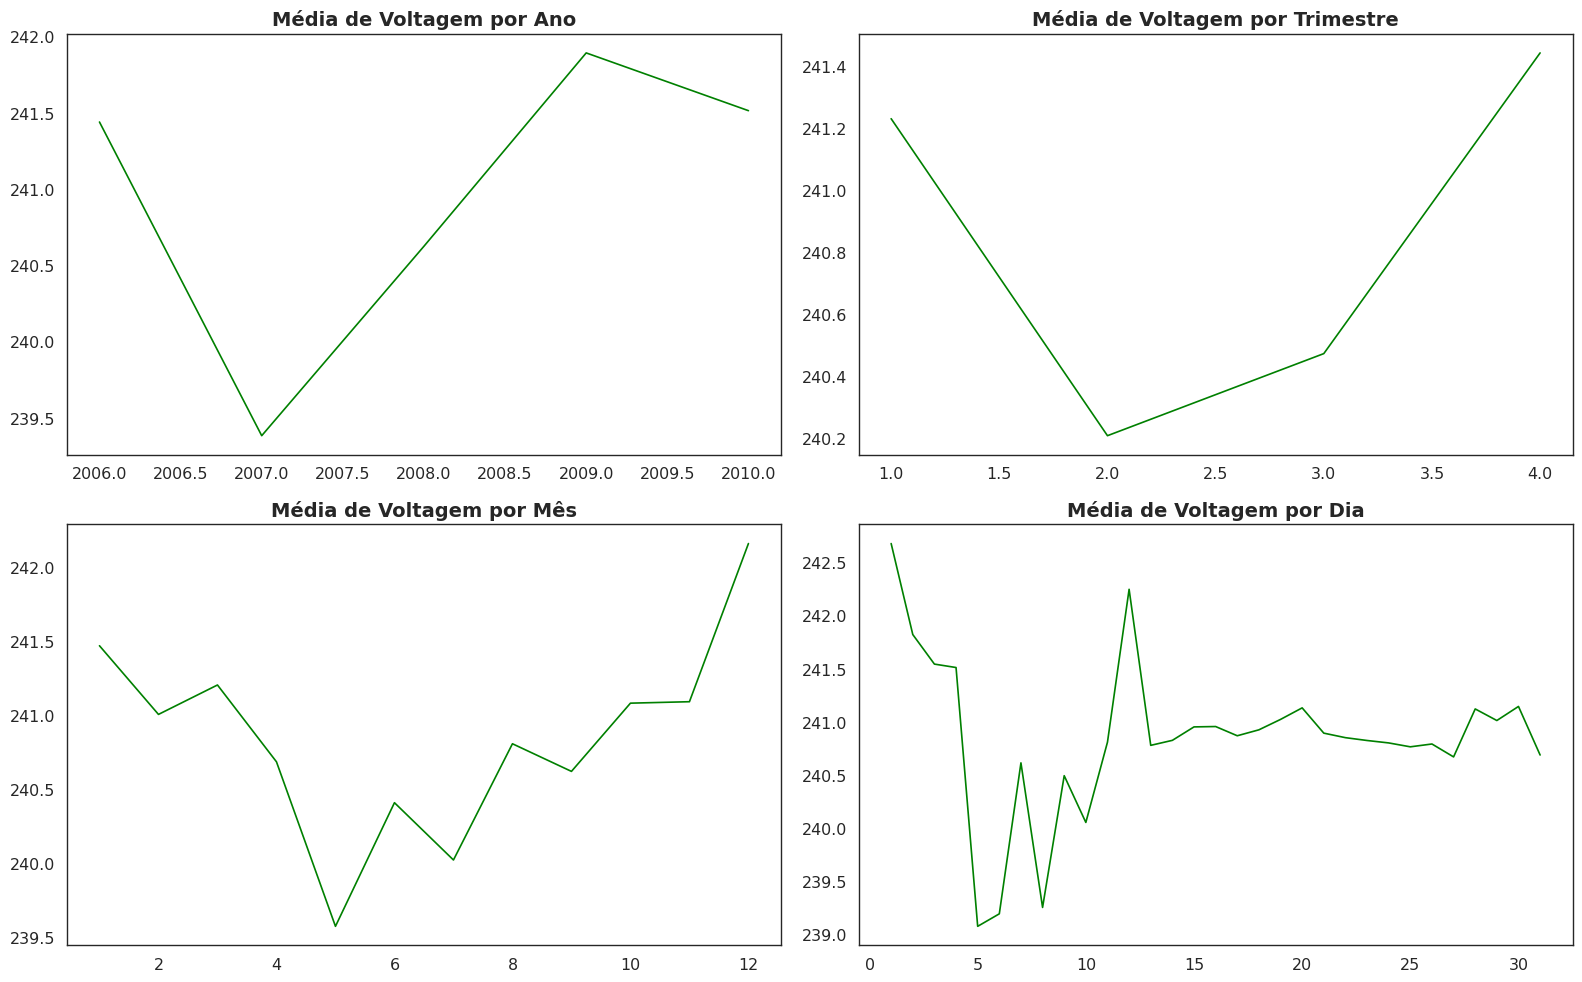

In [ ]:
# Importa a biblioteca matplotlib para traçar gráficos
import matplotlib.pyplot as plt

# Cria uma figura com 2 linhas e 2 colunas e ajusta seu tamanho para 16x10
plt.figure(figsize=(16, 10))

# Primeira subtrama na primeira linha, primeira coluna
plt.subplot(2, 2, 1)

# Agrupa os dados por ano e calcula a média da coluna 'Voltage'
grouped_by_year = data.groupby('year').Voltage.agg('mean')

# Plota a média de 'Voltage' por ano com cor azul
grouped_by_year.plot(color='green')

# Define o rótulo x como vazio
plt.xlabel('')

# Define o título como 'Média de Intensidade de Energia Global por Ano' com tamanho de fonte 12 e peso da fonte 'negrito'
plt.title('Média de Voltagem por Ano', fontsize=14, fontweight='bold')

# Segunda subtrama na primeira linha, segunda coluna
plt.subplot(2, 2, 2)

# Agrupa os dados por trimestre e calcula a média da coluna 'Voltage'
grouped_by_quarter = data.groupby('quarter').Voltage.agg('mean')

# Plota a média de 'Voltage' por trimestre com cor azul
grouped_by_quarter.plot(color='green')

# Define o rótulo x como vazio
plt.xlabel('')

# Define o título como 'Média de Intensidade de Energia Global por Trimestre' com tamanho de fonte 12 e peso da fonte 'negrito'
plt.title('Média de Voltagem por Trimestre', fontsize=14, fontweight='bold')

# Terceira subtrama na segunda linha, primeira coluna
plt.subplot(2, 2, 3)

# Agrupa os dados por mês e calcula a média da coluna 'Voltage'
grouped_by_month = data.groupby('month').Voltage.agg('mean')

# Plota a média de 'Voltage' por mês com cor azul
grouped_by_month.plot(color='green')

# Define o rótulo x como vazio
plt.xlabel('')

# Define o título como 'Média de Intensidade de Energia Global por Mês' com tamanho de fonte 12 e peso da fonte 'negrito'
plt.title('Média de Voltagem por Mês', fontsize=14, fontweight='bold')

# Quarta subtrama na segunda linha, segunda coluna
plt.subplot(2, 2, 4)

# Agrupa os dados por dia e calcula a média da coluna 'Voltage'
grouped_by_day = data.groupby('day').Voltage.agg('mean')

# Plota a média de 'Voltage' por dia com cor azul
grouped_by_day.plot(color='green')

# Define o rótulo x como vazio
plt.xlabel('')

# Define o título como 'Média de Intensidade de Energia Global por Dia' com tamanho de fonte 12 e peso da fonte 'negrito'
plt.title('Média de Voltagem por Dia', fontsize=14, fontweight='bold')

# Usa tight_layout para ajustar as subtramas para que se encaixem na área da figura
plt.tight_layout()

# Mostra o gráfico
plt.show()


#**AGRUPAMENTO DE DADOS**

In [ ]:
import pandas as pd

# Leitura dos dados
# Carregue os dados do arquivo 'household_power_consumption.txt' usando pandas
# e especifique o delimitador como ';'
data = pd.read_csv('/household_power_consumption.txt', delimiter=';')

# Converte as colunas 'Data' e 'Hora' em uma única coluna 'data_hora'
# combinando as duas colunas e convertendo para o formato data e hora

data['date_time'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

# Converte a coluna 'Global_active_power' para formato numérico
# e remova todas as linhas com valores NaN
data['Global_active_power'] = pd.to_numeric(data['Voltage'], errors='coerce')
data = data.dropna(subset=['Global_active_power'])

# Converte a coluna 'Voltage' para formato numérico
# e remova todas as linhas com valores NaN
data['Voltage'] = pd.to_numeric(data['Voltage'], errors='coerce')
data = data.dropna(subset=['Voltage'])

# Converte a coluna 'Global_intensity' para formato numérico
# e remova todas as linhas com valores NaN
data['Global_intensity'] = pd.to_numeric(data['Global_intensity'], errors='coerce')
data = data.dropna(subset=['Global_intensity'])

# Converte a coluna 'date_time' para o formato datetime
data['date_time'] = pd.to_datetime(data['date_time'])


<ipython-input-9-dd30a4311724>:6: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/household_power_consumption.txt', delimiter=';')


In [ ]:
import pandas as pd

# Leitura e Limpeza dos Dados
data = pd.read_csv('/household_power_consumption.txt', delimiter=';')
data['date_time'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])
data['Global_active_power'] = pd.to_numeric(data['Voltage'], errors='coerce')
data = data.dropna(subset=['Global_active_power'])
data['Voltage'] = pd.to_numeric(data['Voltage'], errors='coerce')
data = data.dropna(subset=['Voltage'])
data['Global_intensity'] = pd.to_numeric(data['Global_intensity'], errors='coerce')
data = data.dropna(subset=['Global_intensity'])
data['date_time'] = pd.to_datetime(data['date_time'])

# Salvar dados limpos em um arquivo CSV
data.to_csv('/arquivo_limpo.csv', index=False)


<ipython-input-11-512a5ea6f5c5>:4: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/household_power_consumption.txt', delimiter=';')


In [ ]:
#df = pd.read_csv('/arquivo_limpo.csv', delimiter=',')

#dt.head(5)


## Se você já tem o DataFrame, pode carregá-lo assim:
# df = seu_dataframe_existente

## Se você precisa carregar o DataFrame a partir de um arquivo CSV, use algo como:
# df = pd.read_csv('seuarquivo.csv')

## Supondo que você tenha o DataFrame carregado, você pode fazer as remoções desejadas:
#columns_to_remove = ['Date', 'Time', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
#df = df.drop(columns=columns_to_remove)

## Agora, você pode salvar o DataFrame modificado em um novo arquivo CSV:
# df.to_csv('housefr.csv', index=False)

## Ou se você quiser baixá-lo diretamente do Google Colab, use o seguinte código:
#from google.colab import files

#files.download('housefr.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd

df = pd.read_csv('/housefr.csv', delimiter=',')


ultimas_5_linhas = df.tail(5)

# Imprima as últimas 5 linhas
print(ultimas_5_linhas)

         Global_active_power  Global_reactive_power  Voltage  \
2049275               240.43                    0.0   240.43   
2049276               240.00                    0.0   240.00   
2049277               239.82                    0.0   239.82   
2049278               239.70                    0.0   239.70   
2049279               239.55                    0.0   239.55   

         Global_intensity            date_time  
2049275               4.0  2010-11-26 20:58:00  
2049276               4.0  2010-11-26 20:59:00  
2049277               3.8  2010-11-26 21:00:00  
2049278               3.8  2010-11-26 21:01:00  
2049279               3.8  2010-11-26 21:02:00  


In [ ]:
!pip install pandas matplotlib scikit-learn

#**Gráfico de Pizza**

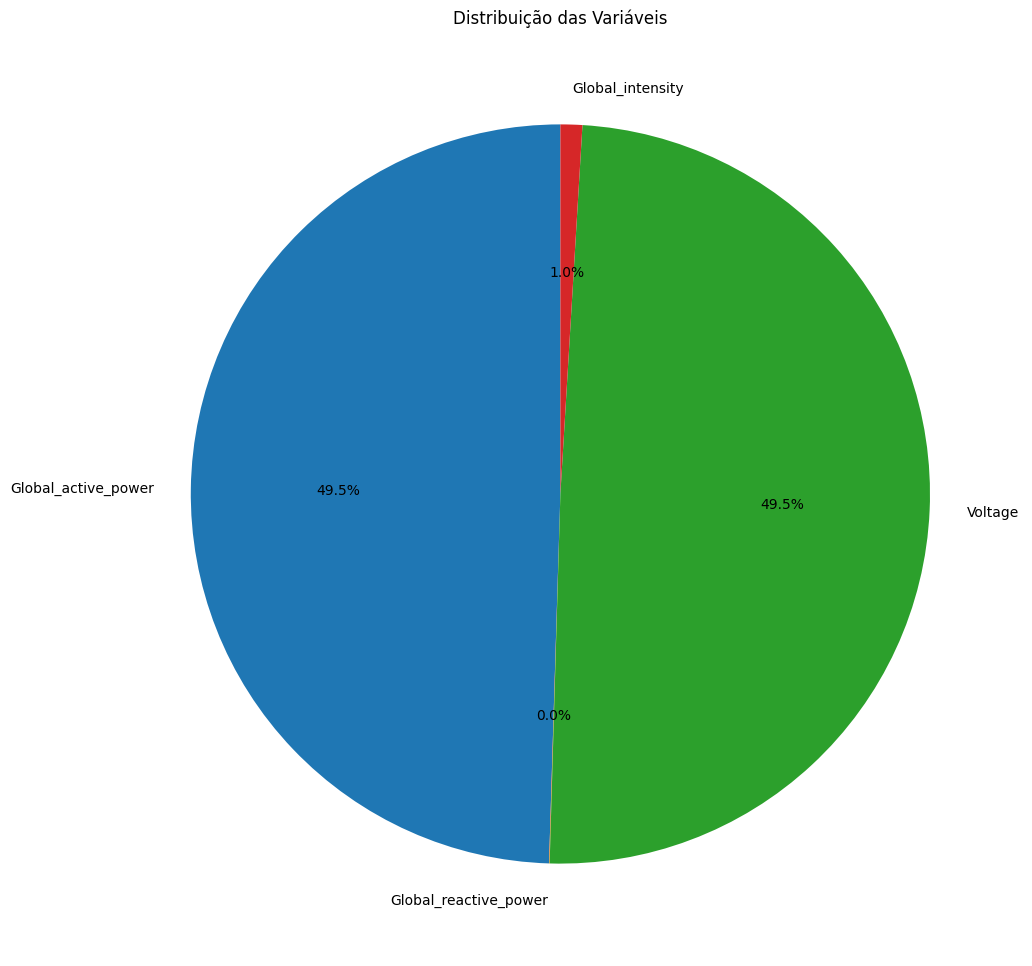

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
df = pd.read_csv('/housefr.csv')


# Remover a coluna 'date_time' para análises de pizza e agrupamento
df_for_analysis = df.drop(columns=['date_time'])


# Plotar o gráfico de pizza para todas as variáveis
plt.figure(figsize=(12, 12))
df_for_analysis.sum().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribuição das Variáveis')
plt.show()


#**Gráfico 2D de Agrupamento K-Médias**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


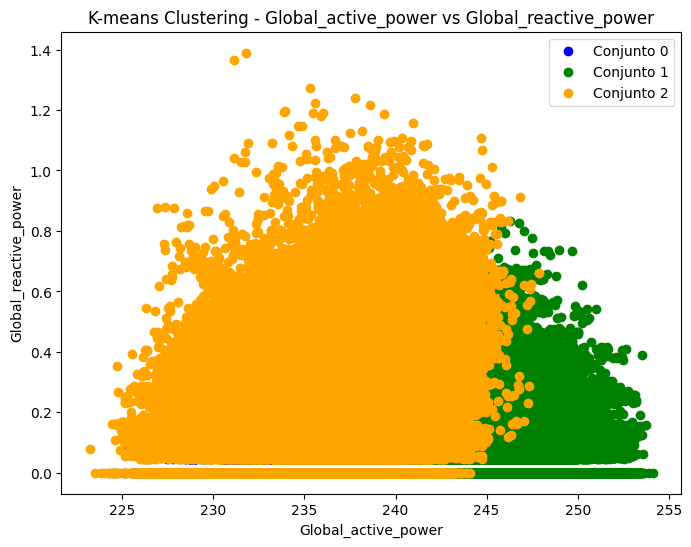

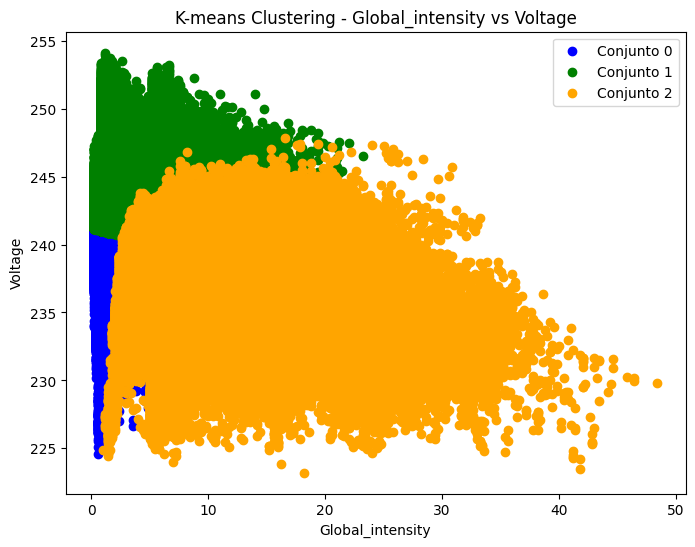

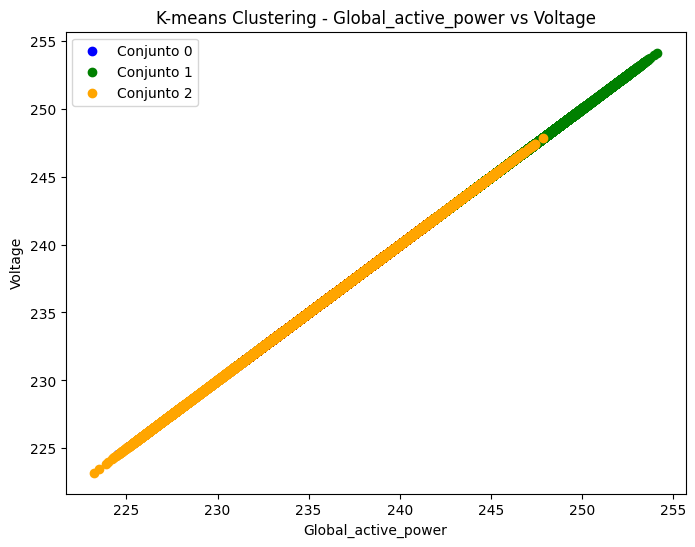

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Carregar o arquivo CSV
df = pd.read_csv('/housefr.csv')


# Remover a coluna 'date_time' para análises de pizza e agrupamento
df_for_analysis = df.drop(columns=['date_time'])


# Preparar os dados para K-médias
data_for_clustering = df_for_analysis[['Global_active_power', 'Global_reactive_power', 'Global_intensity', 'Voltage']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

kmeans = KMeans(n_clusters=3, random_state=42)
df_for_analysis['kmeans_cluster'] = kmeans.fit_predict(scaled_data)

# Lista de combinações de variáveis
variable_combinations = [('Global_active_power', 'Global_reactive_power'),
                         ('Global_intensity', 'Voltage'),
                         ('Global_active_power', 'Voltage')]

# Plotar gráficos 2D para cada combinação de variáveis
for var1, var2 in variable_combinations:
    plt.figure(figsize=(8, 6))

    # Associar cores específicas a cada cluster
    colors = {0: 'blue', 1: 'green', 2: 'orange'}
    for cluster, color in colors.items():
        cluster_points = df_for_analysis[df_for_analysis['kmeans_cluster'] == cluster]
        plt.scatter(cluster_points[var1], cluster_points[var2], label=f'Conjunto {cluster}', c=color)

    plt.title(f'K-means Clustering - {var1} vs {var2}')
    plt.xlabel(var1)
    plt.ylabel(var2)
    plt.legend()
    plt.show()


#**Gráfico 3D de Agrupamento K-Médias**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


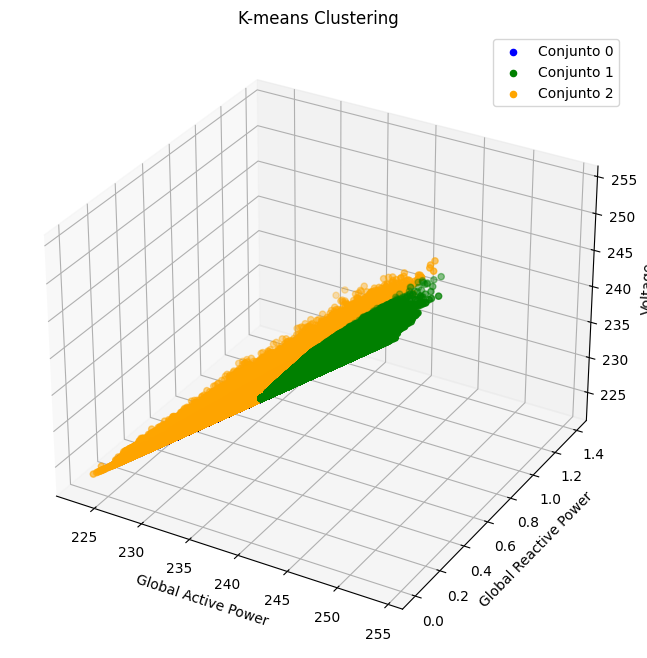

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar o arquivo CSV
df = pd.read_csv('/housefr.csv')


# Remover a coluna 'date_time' para análises de pizza e agrupamento
df_for_analysis = df.drop(columns=['date_time'])


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parte 2: Gráfico 3D de Agrupamento K-médias
data_for_clustering = df_for_analysis[['Global_active_power', 'Global_reactive_power', 'Global_intensity', 'Voltage']]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

kmeans = KMeans(n_clusters=3, random_state=42)
df_for_analysis['kmeans_cluster'] = kmeans.fit_predict(scaled_data)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Associar cores específicas a cada cluster
colors = {0: 'blue', 1: 'green', 2: 'orange'}
for cluster, color in colors.items():
    cluster_points = df_for_analysis[df_for_analysis['kmeans_cluster'] == cluster]
    ax.scatter(
        cluster_points['Global_active_power'],
        cluster_points['Global_reactive_power'],
        cluster_points['Voltage'],
        label=f'Conjunto {cluster}',
        c=color,
    )

ax.set_title('K-means Clustering')
ax.set_xlabel('Global Active Power')
ax.set_ylabel('Global Reactive Power')
ax.set_zlabel('Voltage')
ax.legend()  # Adiciona a legenda
plt.show()



#**MODELOS PREDITIVOS**

## **MODELO MLP**

**ALGORITMO:** O código a seguir treina um modelo MLP usando validação cruzada k-fold, normaliza os dados, calcula métricas de desempenho e plota gráficos para avaliação visual. O objetivo é avaliar o desempenho do modelo na previsão de valores de tensão elétrica.




**Descrição do Algoritmo:** Este script em Python implementa um modelo de regressão usando uma Rede Neural MLP (Perceptron de Múltiplas Camadas) com validação cruzada k-fold:

**Importação de Bibliotecas:** Importa bibliotecas como NumPy para manipulação numérica, Matplotlib para visualização, e classes relacionadas ao aprendizado de máquina do scikit-learn.

**Carregamento de Dados:** Supõe que o conjunto de dados esteja carregado na variável data e define a coluna 'date_time' como índice.

**Preparação dos Dados:** Separa as características (X) e o alvo (y).
Normaliza os dados usando o StandardScaler para garantir que todas as variáveis tenham média zero e desvio padrão um.

**Configuração da Validação k-fold:** Configura uma validação cruzada k-fold com 5 dobras, embaralhando os dados e usando uma semente (random_state) para reproducibilidade.

**Treinamento do Modelo MLP com k-fold:** Itera sobre as dobras k-fold, treina um modelo MLP para cada dobra e avalia o desempenho.
O modelo MLP tem duas camadas ocultas com 30 e 10 neurônios, respectivamente, e um máximo de 50 iterações. Taxa de aprendizagem de 10^-3.

**Visualização dos Resultados:** Plota um gráfico para cada dobra k-fold, mostrando os valores reais e as previsões para o conjunto de teste.

**Impressão das Métricas Médias do k-fold:** Calcula e imprime as médias das métricas de desempenho (MAE, MSE, RMSE) para todas as dobras k-fold.



In [ ]:
import pandas as pd

data = pd.read_csv('/housefr.csv', delimiter=',')

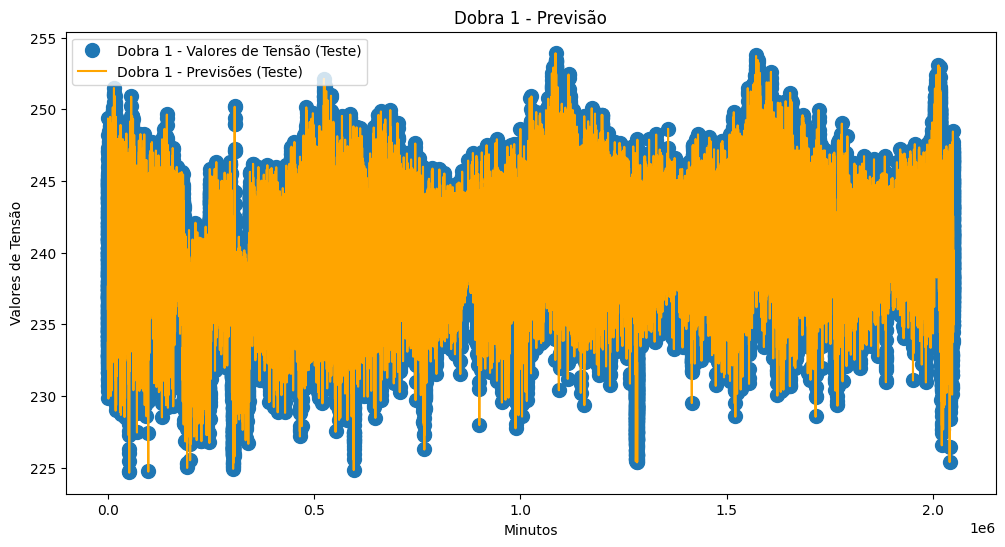

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


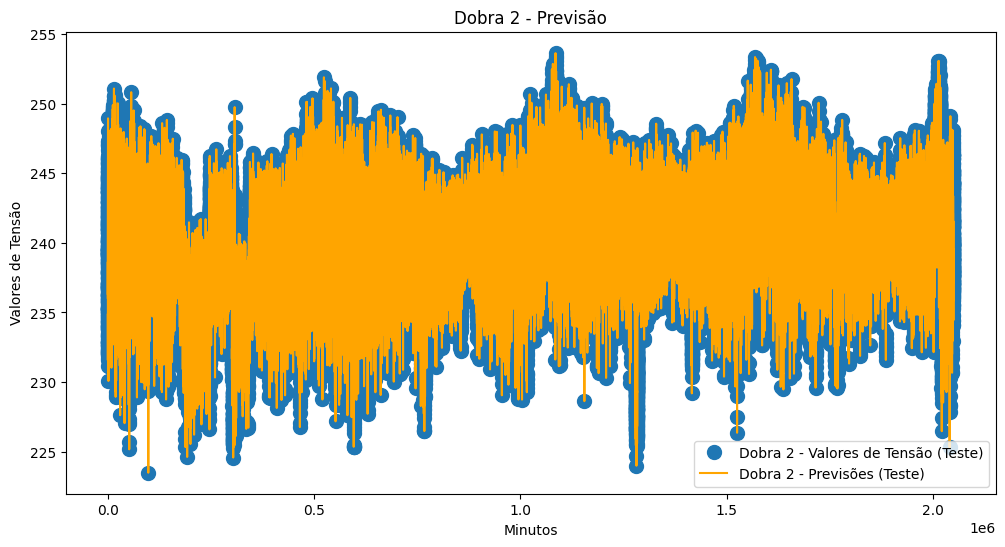

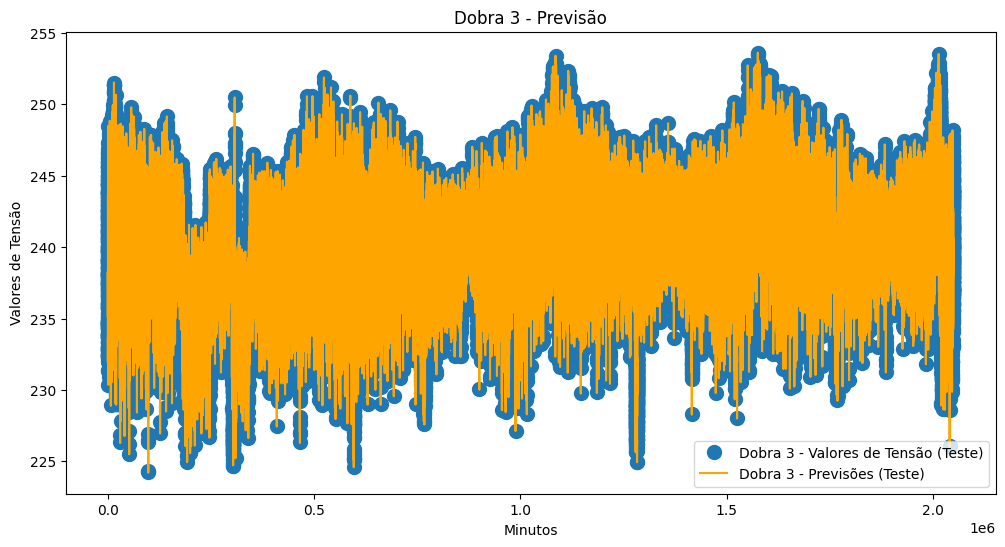

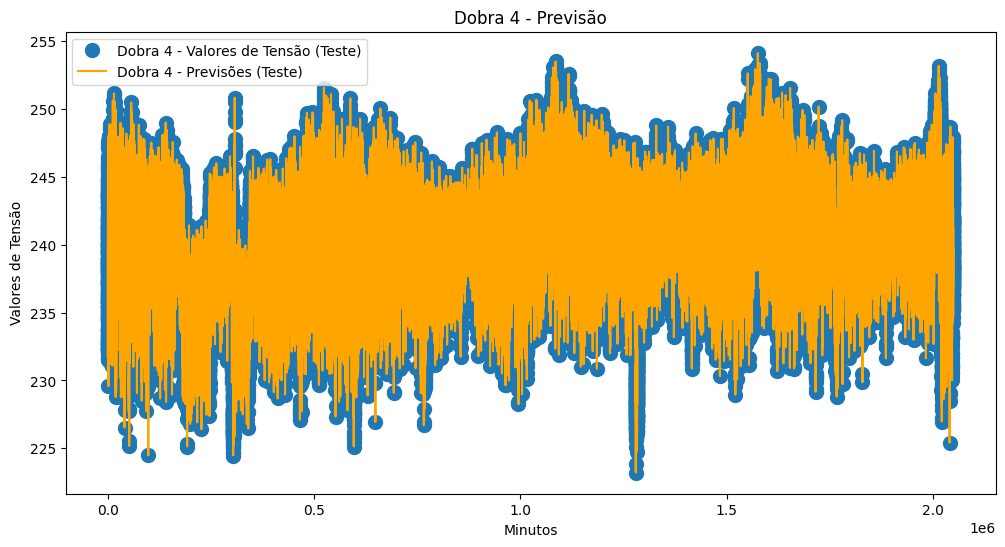

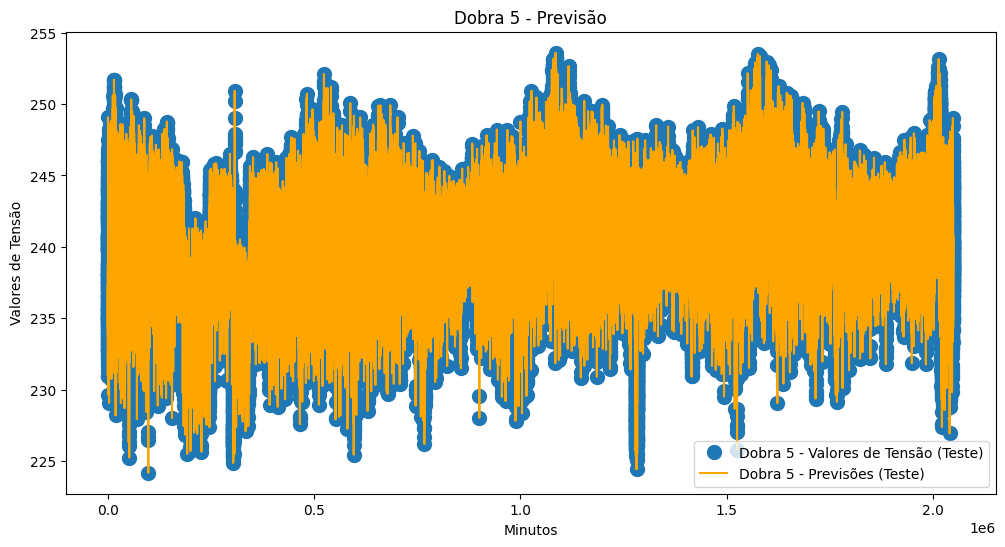

Média MAE: 0.002677524791535492
Média MSE: 2.3790790714997935e-05
Média RMSE: 0.0034781059770028237


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

data

# Suponha que 'data' já esteja carregado
data.set_index('date_time', inplace=True)

# Separando características (X) e alvo (y)
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

# Normalização dos dados usando StandardScaler
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Configuração da validação k-fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores, mse_scores, rmse_scores = [], [], []

for fold, (train_index, test_index) in enumerate(kf.split(X_scaled), 1):
    # Divisão dos dados em conjuntos de treinamento e teste
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_scaled[train_index], y_scaled[test_index]

    # Treinamento do Modelo MLP
    mlp = MLPRegressor(hidden_layer_sizes=(30,10), max_iter=50, random_state=42)
    mlp.fit(X_train, y_train)

    # Previsões no conjunto de teste
    test_predictions_scaled = mlp.predict(X_test)

    # Desnormalização das previsões
    test_predictions = scaler_y.inverse_transform(test_predictions_scaled.reshape(-1, 1)).flatten()

    # Métricas de desempenho
    mae = mean_absolute_error(y.iloc[test_index], test_predictions)
    mse = mean_squared_error(y.iloc[test_index], test_predictions)
    rmse = np.sqrt(mse)

    # Armazenando as métricas para cada fold
    mae_scores.append(mae)
    mse_scores.append(mse)
    rmse_scores.append(rmse)

    # Gráfico de Teste
    plt.figure(figsize=(12, 6))
    plt.plot(test_index, y.iloc[test_index], 'o', label=f'Dobra {fold} - Valores de Tensão (Teste)', markersize=10)
    plt.plot(test_index, test_predictions, '-', label=f'Dobra {fold} - Previsões (Teste)', markersize=3, color='orange')
    plt.title(f'Dobra {fold} - Previsão')
    plt.xlabel('Minutos')
    plt.ylabel('Valores de Tensão')
    plt.legend()
    plt.show()

# Imprimindo métricas médias do k-fold
print(f'Média MAE: {np.mean(mae_scores)}')
print(f'Média MSE: {np.mean(mse_scores)}')
print(f'Média RMSE: {np.mean(rmse_scores)}')


##**MODELOS PERCEPTRON MULTICAMADAS (MLP) E AUTORREGRESSIVO (AR)**

**ALGORITMO:** o script em Python a seguir realiza uma comparação entre um modelo de Regressão Neural MLP (Perceptron de Múltiplas Camadas) e um modelo Autorregressivo (Regressão Linear Simples) para prever valores de tensão elétrica.

**Descrição do Algoritmo:**

**Importação de Bibliotecas:** Importa bibliotecas como NumPy para manipulação numérica, Matplotlib para visualização, e classes relacionadas ao aprendizado de máquina do scikit-learn.

**Preparação dos Dados:** Supõe que o conjunto de dados (data) já foi carregado e define a coluna 'date_time' como índice.
Separa as características (X) e o alvo (y).
Normaliza os dados usando StandardScaler para garantir que todas as variáveis tenham média zero e desvio padrão um.

**Configuração da Validação k-fold:** Configura uma validação cruzada k-fold com 5 dobras.

**Treinamento dos Modelos e Avaliação;**
Para cada dobra k-fold, o código treina dois modelos: uma Rede Neural MLP e um Modelo Autorregressivo (Regressão Linear).
Avalia o desempenho de ambos os modelos utilizando métricas como MAE (Erro Absoluto Médio), MSE (Erro Quadrático Médio) e RMSE (Raiz do Erro Quadrático Médio) para cada dobra.

**Impressão das Métricas Médias do k-fold:** Calcula e imprime as médias das métricas de desempenho para ambos os modelos.

**Gráficos de Teste:** Plota gráficos de teste para ambas as previsões em relação aos valores reais para a última dobra do k-fold.
O primeiro gráfico é para o modelo MLP, e o segundo é para o modelo Autorregressivo.

In [ ]:
import pandas as pd

data = pd.read_csv('/housefr.csv', delimiter=',')

Médias do k-fold para o Modelo MLP:
Média MAE: 0.002677524791535492
Média MSE: 2.3790790714997935e-05
Média RMSE: 0.0034781059770028237

Médias do k-fold para o Modelo Autorregressivo:
Média MAE: 2.6339122430057804e-14
Média MSE: 7.486383609268196e-28
Média RMSE: 2.7321950058456865e-14


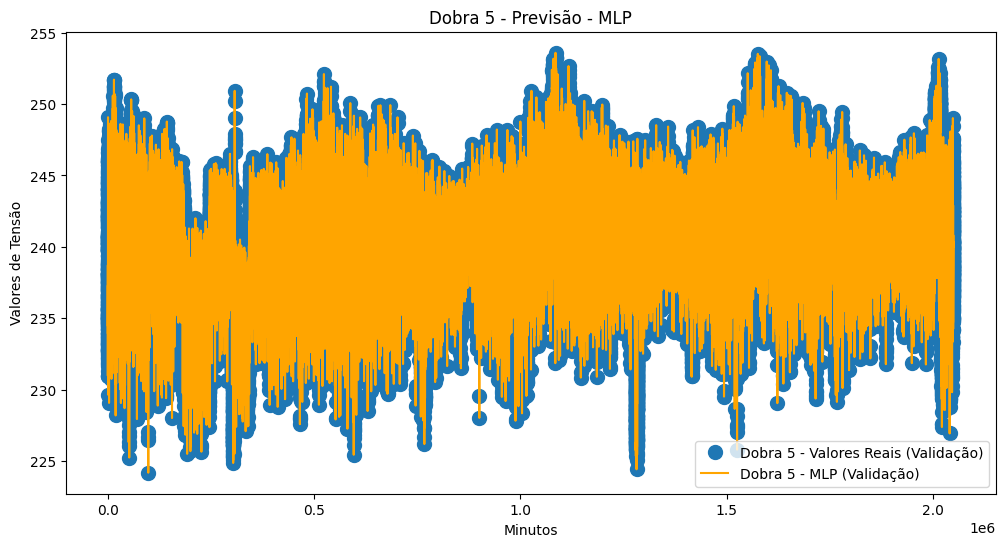

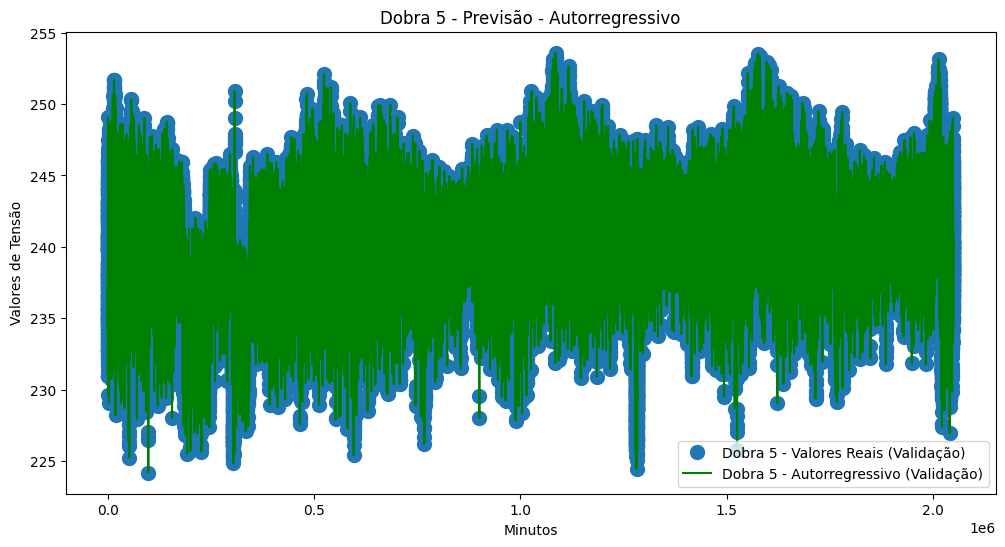

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Suponha que 'data' já esteja carregado
data.set_index('date_time', inplace=True)

# Separando características (X) e alvo (y)
X = data.iloc[:, 1:]
y = data.iloc[:, 0]

# Normalização dos dados usando StandardScaler
scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Configuração da validação k-fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores_mlp, mse_scores_mlp, rmse_scores_mlp = [], [], []
mae_scores_autoregressive, mse_scores_autoregressive, rmse_scores_autoregressive = [], [], []

# Última dobra do K-fold
fold = kf.get_n_splits()

for train_index, test_index in kf.split(X_scaled):
    # Divisão dos dados em conjuntos de treinamento e teste
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y_scaled[train_index], y_scaled[test_index]

    # Treinamento do Modelo MLP
    mlp = MLPRegressor(hidden_layer_sizes=(30,10), max_iter=50, random_state=42)
    mlp.fit(X_train, y_train)

    # Treinamento do Modelo Autorregressivo (Linear Regression)
    autoregressive = LinearRegression()
    autoregressive.fit(X_train, y_train)

    # Avaliação do Modelo MLP
    test_predictions_mlp_scaled = mlp.predict(X_test)
    test_predictions_mlp = scaler_y.inverse_transform(test_predictions_mlp_scaled.reshape(-1, 1)).flatten()

    mae_mlp = mean_absolute_error(y.iloc[test_index], test_predictions_mlp)
    mse_mlp = mean_squared_error(y.iloc[test_index], test_predictions_mlp)
    rmse_mlp = np.sqrt(mse_mlp)

    mae_scores_mlp.append(mae_mlp)
    mse_scores_mlp.append(mse_mlp)
    rmse_scores_mlp.append(rmse_mlp)

    # Avaliação do Modelo Autorregressivo
    test_predictions_autoregressive_scaled = autoregressive.predict(X_test)
    test_predictions_autoregressive_scaled = test_predictions_autoregressive_scaled.reshape(-1, 1)
    test_predictions_autoregressive = scaler_y.inverse_transform(test_predictions_autoregressive_scaled).flatten()

    mae_autoregressive = mean_absolute_error(y.iloc[test_index], test_predictions_autoregressive)
    mse_autoregressive = mean_squared_error(y.iloc[test_index], test_predictions_autoregressive)
    rmse_autoregressive = np.sqrt(mse_autoregressive)

    mae_scores_autoregressive.append(mae_autoregressive)
    mse_scores_autoregressive.append(mse_autoregressive)
    rmse_scores_autoregressive.append(rmse_autoregressive)

# Imprimindo métricas médias do k-fold para o Modelo MLP
print("Médias do k-fold para o Modelo MLP:")
print(f'Média MAE: {np.mean(mae_scores_mlp)}')
print(f'Média MSE: {np.mean(mse_scores_mlp)}')
print(f'Média RMSE: {np.mean(rmse_scores_mlp)}')

# Imprimindo métricas médias do k-fold para o Modelo Autorregressivo
print("\nMédias do k-fold para o Modelo Autorregressivo:")
print(f'Média MAE: {np.mean(mae_scores_autoregressive)}')
print(f'Média MSE: {np.mean(mse_scores_autoregressive)}')
print(f'Média RMSE: {np.mean(rmse_scores_autoregressive)}')

# Gráfico de Teste para MLP
plt.figure(figsize=(12, 6))
plt.plot(test_index, y.iloc[test_index], 'o', label=f'Dobra {fold} - Valores Reais (Validação)', markersize=10)
plt.plot(test_index, test_predictions_mlp, '-', label=f'Dobra {fold} - MLP (Validação)', markersize=3, color='orange')
plt.title(f'Dobra {fold} - Previsão - MLP')
plt.xlabel('Minutos')
plt.ylabel('Valores de Tensão')
plt.legend()
plt.show()

# Gráfico de Teste para Autorregressivo
plt.figure(figsize=(12, 6))
plt.plot(test_index, y.iloc[test_index], 'o', label=f'Dobra {fold} - Valores Reais (Validação)', markersize=10)
plt.plot(test_index, test_predictions_autoregressive, '-', label=f'Dobra {fold} - Autorregressivo (Validação)', markersize=3, color='green')
plt.title(f'Dobra {fold} - Previsão - Autorregressivo')
plt.xlabel('Minutos')
plt.ylabel('Valores de Tensão')
plt.legend()
plt.show()
